In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import statsmodels.graphics.tsaplots as tsp
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.ar_model import AutoReg
import plotly.graph_objs as go
from statsmodels.graphics.tsaplots import pacf,acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/creditcard.csv")

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:


df['Time_Timedelta'] = pd.to_timedelta(df['Time'], unit='s')


df.set_index('Time_Timedelta', inplace=True)

# Resample the data into 1-hour intervals
resampled_data = df.resample('1H').agg({
    'Amount': ['sum', 'mean', 'count'],  
    'Class': ['sum']                      # Total number of frauds (frauds are marked by '1')
})

resampled_data.columns = ['Total_Amount', 'Avg_Amount', 'Transaction_Count', 'Fraud_Count']


resampled_data.fillna(0, inplace=True)


resampled_data.reset_index(inplace=True)


resampled_data.head()



<ipython-input-4-f94f191b0a94>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_data = df.resample('1H').agg({


Time_Timedelta  Total_Amount  Avg_Amount  Transaction_Count  Fraud_Count
0 0 days 00:00:00     257101.87   64.875566               3963            2
1 0 days 01:00:00     146105.69   65.902431               2217            2
2 0 days 02:00:00     108819.17   69.047697               1576           21
3 0 days 03:00:00      94306.84   51.788490               1821           13
4 0 days 04:00:00      79840.62   73.789852               1082            6

In [ ]:

resampled_data.to_csv("/content/drive/MyDrive/resampled_dataset.csv", index=False)

print("The resampled dataset has been saved as 'resampled_dataset.csv'.")


The resampled dataset has been saved as 'resampled_dataset.csv'.


In [ ]:

df['Time_Timedelta'] = pd.to_timedelta(df['Time'], unit='s')


df.set_index('Time_Timedelta', inplace=True)

agg_dict = {f'V{i}': 'mean' for i in range(1, 29)}  # For V1 to V28
agg_dict.update({
    'Amount': ['sum', 'mean', 'count'],  
    'Class': ['sum']                      # Total number of frauds (frauds are marked by '1')
})


resampled_data_3 = df.resample('1T').agg(agg_dict)

resampled_data_3.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in resampled_data_3.columns]

new_column_names = [f'V{i}' for i in range(1, 29)] + ['Total_Amount', 'Avg_Amount', 'Transaction_Count', 'Fraud_Count']

resampled_data_3.columns = new_column_names

resampled_data_3.fillna(0, inplace=True)

resampled_data_3.reset_index(inplace=True)

resampled_data_3.head()

<ipython-input-5-68967cc41474>:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data_3 = df.resample('1T').agg(agg_dict)


Time_Timedelta        V1        V2        V3        V4        V5        V6  \
0 0 days 00:00:00 -0.134210  0.111749  0.878489  0.385753  0.095076  0.358206   
1 0 days 00:01:00 -0.348715  0.193169  0.731627  0.307141 -0.221095  0.282003   
2 0 days 00:02:00 -0.303111  0.142598  0.831252  0.461439  0.134941  0.537330   
3 0 days 00:03:00 -0.173017  0.375659  0.907473  0.281098  0.200010  0.341918   
4 0 days 00:04:00 -0.112940  0.275023  1.011196  0.281306  0.005624 -0.005864   

         V7        V8        V9  ...       V23       V24       V25       V26  \
0  0.165694 -0.007488 -0.054695  ...  0.001386  0.093310  0.128103 -0.045143   
1  0.325290 -0.049715  0.070292  ... -0.093719  0.007797  0.161715  0.021275   
2 -0.108670  0.053330  0.198355  ... -0.004480 -0.080340  0.102420  0.058292   
3  0.189654  0.012511 -0.178782  ... -0.079186 -0.094699  0.116441 -0.062915   
4  0.124303 -0.251391 -0.018590  ...  0.003163  0.121326  0.097442  0.033180   

        V27       V28  Total_Amount  Avg_Amount  Transaction_Count  \
0  0.017992  0.006995       6193.06   68.055604                 91   
1  0.010559 -0.075358      11533.61  124.017312                 93   
2  0.010903 -0.011255       5105.36   71.906479                 71   
3  0.052002  0.002998       3541.24   48.510137                 73   
4  0.018757 -0.046453       3660.23   42.071609                 87   

   Fraud_Count  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 33 columns]

In [ ]:

resampled_data_3.to_csv("/content/drive/MyDrive/resampled_dataset_minute_PCA_2.csv", index=False)


print("The resampled dataset has been saved as 'resampled_dataset_minute_PCA_2.csv'.")

The resampled dataset has been saved as 'resampled_dataset_minute_PCA_2.csv'.


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

resampled_data = resampled_data_3

columns_to_test = ['Total_Amount', 'Avg_Amount', 'Transaction_Count', 'Fraud_Count'] + \
                  [f'V{i}' for i in range(1, 29)]  # Add PCA components (V1 to V28)

def adf_test(series, column_name):
    result = adfuller(series.dropna())
    print(f'ADF Statistic for {column_name}: {result[0]}')
    print(f'p-value for {column_name}: {result[1]}')
    if result[1] <= 0.05:
        print(f'{column_name} is stationary (reject null hypothesis)')
    else:
        print(f'{column_name} is non-stationary (fail to reject null hypothesis)')
    print('-'*50)

for column in columns_to_test:
    adf_test(resampled_data[column], column)


ADF Statistic for Total_Amount: -1.6190377851276494
p-value for Total_Amount: 0.4732337863738894
Total_Amount is non-stationary (fail to reject null hypothesis)
--------------------------------------------------
ADF Statistic for Avg_Amount: -4.981274591255413
p-value for Avg_Amount: 2.4166960572326896e-05
Avg_Amount is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for Transaction_Count: -1.5602571944246548
p-value for Transaction_Count: 0.503520700490962
Transaction_Count is non-stationary (fail to reject null hypothesis)
--------------------------------------------------
ADF Statistic for Fraud_Count: -14.390055940654985
p-value for Fraud_Count: 8.855598575857953e-27
Fraud_Count is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for V1: -3.6481958257521563
p-value for V1: 0.004903729015290103
V1 is stationary (reject null hypothesis)
--------------------------------------------

In [ ]:
import statsmodels.tsa.stattools as smt

def kpss_test(series, **kwargs):
    statistic, p_value, n_lags, critical_values = smt.kpss(series, **kwargs)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')

    if p_value < 0.05:
        print("Series is not stationary (reject null hypothesis).")
    else:
        print("Series is stationary (fail to reject null hypothesis).")
    print()

for column in resampled_data_3.columns[1:]:  
    print(f'Testing stationarity for {column}:')
    kpss_test(resampled_data_3[column], regression='c')  

Testing stationarity for V1:
KPSS Statistic: 7.247488874266284
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary (reject null hypothesis).

Testing stationarity for V2:
KPSS Statistic: 1.120546054314741
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary (reject null hypothesis).

Testing stationarity for V3:
KPSS Statistic: 7.956691678343141
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary (reject null hypothesis).

Testing stationarity for V4:
KPSS Statistic: 4.585454025123798
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary (reject null hypothesis).

Testing stationarity for V5:
KPSS Statistic: 5.632779181341041
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary (reject null hypo

<ipython-input-7-de8a05788abf>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series, **kwargs)
<ipython-input-7-de8a05788abf>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series, **kwargs)
<ipython-input-7-de8a05788abf>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series, **kwargs)
<ipython-input-7-de8a05788abf>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller

In [ ]:
df_actual_stationary = pd.read_csv(r"/content/drive/MyDrive/stationary_dataset_edited.csv")

print(df_actual_stationary.head())

    Time_Timedelta        V1        V2        V3        V4        V5  \
0  0 days 00:00:00 -0.134210  0.111749       NaN  0.385753       NaN   
1  0 days 00:01:00 -0.348715  0.193169 -0.146862  0.307141 -0.316172   
2  0 days 00:02:00 -0.303111  0.142598  0.099625  0.461439  0.356036   
3  0 days 00:03:00 -0.173017  0.375659  0.076221  0.281098  0.065069   
4  0 days 00:04:00 -0.112940  0.275023  0.103723  0.281306 -0.194385   

         V6        V7        V8        V9  ...       V23       V24       V25  \
0  0.358206  0.165694 -0.007488       NaN  ...  0.001386  0.093310       NaN   
1  0.282003  0.325290 -0.049715  0.124987  ... -0.093719  0.007797  0.033612   
2  0.537330 -0.108670  0.053330  0.128063  ... -0.004480 -0.080340 -0.059295   
3  0.341918  0.189654  0.012511 -0.377136  ... -0.079186 -0.094699  0.014021   
4 -0.005864  0.124303 -0.251391  0.160191  ...  0.003163  0.121326 -0.018999   

        V26       V27       V28  Total_Amount  Avg_Amount  Transaction_Count  \
0 -0.0

In [ ]:
columns_to_test = ['Total_Amount', 'Avg_Amount', 'Transaction_Count', 'Fraud_Count'] + \
                  [f'V{i}' for i in range(1, 29)]  # Add PCA components (V1 to V28)


def adf_test(series, column_name):
    result = adfuller(series.dropna())
    print(f'ADF Statistic for {column_name}: {result[0]}')
    print(f'p-value for {column_name}: {result[1]}')
    if result[1] <= 0.05:
        print(f'{column_name} is stationary (reject null hypothesis)')
    else:
        print(f'{column_name} is non-stationary (fail to reject null hypothesis)')
    print('-'*50)

for column in columns_to_test:
    adf_test(df_actual_stationary[column], column)

ADF Statistic for Total_Amount: -18.256459376479
p-value for Total_Amount: 2.336452556282798e-30
Total_Amount is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for Avg_Amount: -4.98127459131544
p-value for Avg_Amount: 2.4166960565736244e-05
Avg_Amount is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for Transaction_Count: -18.23371795692432
p-value for Transaction_Count: 2.3639049578537766e-30
Transaction_Count is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for Fraud_Count: -14.390055940654985
p-value for Fraud_Count: 8.855598575857953e-27
Fraud_Count is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for V1: -3.6481958253421087
p-value for V1: 0.0049037290220613474
V1 is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic

In [ ]:

def kpss_test(series, **kwargs):

    series_clean = series.dropna()

    statistic, p_value, n_lags, critical_values = smt.kpss(series_clean, **kwargs)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')

    if p_value < 0.05:
        print("Series is not stationary (reject null hypothesis).")
    else:
        print("Series is stationary (fail to reject null hypothesis).")
    print()

# Run KPSS test for PCA components V1 to V28 in the resampled data
for column in df_actual_stationary.columns[1:]: 
    print(f'Testing stationarity for {column}:')
    kpss_test(df_actual_stationary[column], regression='c')  # regression='c' tests for trend stationarity

Testing stationarity for V1:
KPSS Statistic: 7.247488874279009
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary (reject null hypothesis).

Testing stationarity for V2:
KPSS Statistic: 1.1205460541759071
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary (reject null hypothesis).

Testing stationarity for V3:
KPSS Statistic: 0.14167159410861
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary (fail to reject null hypothesis).

Testing stationarity for V4:
KPSS Statistic: 4.585454024582921
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary (reject null hypothesis).

Testing stationarity for V5:
KPSS Statistic: 0.07598561687163134
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary (fail to reject n

<ipython-input-42-cdc8d5cab8e9>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series_clean, **kwargs)
<ipython-input-42-cdc8d5cab8e9>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series_clean, **kwargs)
<ipython-input-42-cdc8d5cab8e9>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series_clean, **kwargs)
<ipython-input-42-cdc8d5cab8e9>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The act

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kwargs):
    series_clean = series.dropna()
    statistic, p_value, n_lags, critical_values = kpss(series_clean, **kwargs)
    return p_value

def make_stationary(series, column_name):
    p_value = kpss_test(series, regression='c')

    if p_value < 0.05:  # Non-stationary
        print(f'{column_name}: Applying first differencing...')
        series_diff1 = series.diff().dropna()

        p_value_diff1 = kpss_test(series_diff1, regression='c')

        if p_value_diff1 < 0.05:  # Still non-stationary
            print(f'{column_name}: Applying second differencing...')
            series_diff2 = series_diff1.diff().dropna()

            p_value_diff2 = kpss_test(series_diff2, regression='c')

            if p_value_diff2 < 0.05:
                print(f'{column_name}: Still non-stationary after second differencing.')
            else:
                print(f'{column_name}: Stationary after second differencing.')
            return series_diff2 
        else:
            print(f'{column_name}: Stationary after first differencing.')
        return series_diff1 
        print(f'{column_name}: Already stationary.')
    return series 


for column in df_actual_stationary.columns[1:]:  # Skip the first ('Time_Timedelta') and last ('DateTime') columns
    print(f'Testing stationarity for {column}:')
    df_actual_stationary[column] = make_stationary(df_actual_stationary[column], column)

Testing stationarity for V1:
V1: Applying first differencing...
V1: Stationary after first differencing.
Testing stationarity for V2:
V2: Applying first differencing...
V2: Stationary after first differencing.
Testing stationarity for V3:
V3: Already stationary.
Testing stationarity for V4:
V4: Applying first differencing...
V4: Stationary after first differencing.
Testing stationarity for V5:
V5: Already stationary.
Testing stationarity for V6:
V6: Applying first differencing...
V6: Stationary after first differencing.
Testing stationarity for V7:
V7: Applying first differencing...
V7: Stationary after first differencing.
Testing stationarity for V8:
V8: Applying first differencing...
V8: Stationary after first differencing.
Testing stationarity for V9:
V9: Already stationary.
Testing stationarity for V10:
V10: Applying first differencing...
V10: Stationary after first differencing.
Testing stationarity for V11:
V11: Already stationary.
Testing stationarity for V12:
V12: Already stati

<ipython-input-43-f9899273af2b>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series_clean, **kwargs)
<ipython-input-43-f9899273af2b>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series_clean, **kwargs)
<ipython-input-43-f9899273af2b>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series_clean, **kwargs)
<ipython-input-43-f9899273af2b>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value 

In [ ]:
columns_to_test = ['Total_Amount', 'Avg_Amount', 'Transaction_Count', 'Fraud_Count'] + \
                  [f'V{i}' for i in range(1, 29)]  # Add PCA components (V1 to V28)


def adf_test(series, column_name):
    result = adfuller(series.dropna())
    print(f'ADF Statistic for {column_name}: {result[0]}')
    print(f'p-value for {column_name}: {result[1]}')
    if result[1] <= 0.05:
        print(f'{column_name} is stationary (reject null hypothesis)')
    else:
        print(f'{column_name} is non-stationary (fail to reject null hypothesis)')
    print('-'*50)

for column in columns_to_test:
    adf_test(df_actual_stationary[column], column)

ADF Statistic for Total_Amount: -18.256459376479
p-value for Total_Amount: 2.336452556282798e-30
Total_Amount is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for Avg_Amount: -16.257265366746026
p-value for Avg_Amount: 3.595448126741874e-29
Avg_Amount is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for Transaction_Count: -18.23371795692432
p-value for Transaction_Count: 2.3639049578537766e-30
Transaction_Count is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for Fraud_Count: -14.390055940654985
p-value for Fraud_Count: 8.855598575857953e-27
Fraud_Count is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statistic for V1: -16.241749845308632
p-value for V1: 3.7213990569617036e-29
V1 is stationary (reject null hypothesis)
--------------------------------------------------
ADF Statist

In [ ]:

def kpss_test(series, **kwargs):

    series_clean = series.dropna()

    statistic, p_value, n_lags, critical_values = smt.kpss(series_clean, **kwargs)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')

    if p_value < 0.05:
        print("Series is not stationary (reject null hypothesis).")
    else:
        print("Series is stationary (fail to reject null hypothesis).")
    print()

for column in df_actual_stationary.columns[1:]:  # Skip the first column which is the index ('Time_Timedelta')
    print(f'Testing stationarity for {column}:')
    kpss_test(df_actual_stationary[column], regression='c') 

Testing stationarity for V1:
KPSS Statistic: 0.022079882948275974
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary (fail to reject null hypothesis).

Testing stationarity for V2:
KPSS Statistic: 0.11982415191416908
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary (fail to reject null hypothesis).

Testing stationarity for V3:
KPSS Statistic: 0.14167159410861
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary (fail to reject null hypothesis).

Testing stationarity for V4:
KPSS Statistic: 0.04875986175855434
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary (fail to reject null hypothesis).

Testing stationarity for V5:
KPSS Statistic: 0.07598561687163134
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary (f

<ipython-input-45-cdc8d5cab8e9>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series_clean, **kwargs)
<ipython-input-45-cdc8d5cab8e9>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series_clean, **kwargs)
<ipython-input-45-cdc8d5cab8e9>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = smt.kpss(series_clean, **kwargs)
<ipython-input-45-cdc8d5cab8e9>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The act

In [ ]:
print(df_actual_stationary.head())

    Time_Timedelta        V1        V2        V3        V4        V5  \
0  0 days 00:00:00       NaN       NaN       NaN       NaN       NaN   
1  0 days 00:01:00 -0.214505  0.081420 -0.146862 -0.078612 -0.316172   
2  0 days 00:02:00  0.045603 -0.050572  0.099625  0.154298  0.356036   
3  0 days 00:03:00  0.130094  0.233061  0.076221 -0.180342  0.065069   
4  0 days 00:04:00  0.060077 -0.100636  0.103723  0.000209 -0.194385   

         V6        V7        V8        V9  ...       V23       V24       V25  \
0       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1 -0.076202  0.159596 -0.042227  0.124987  ... -0.095105 -0.085513  0.033612   
2  0.255326 -0.433960  0.103045  0.128063  ...  0.089239 -0.088137 -0.059295   
3 -0.195411  0.298324 -0.040819 -0.377136  ... -0.074707 -0.014359  0.014021   
4 -0.347783 -0.065351 -0.263902  0.160191  ...  0.082349  0.216025 -0.018999   

        V26       V27       V28  Total_Amount  Avg_Amount  Transaction_Count  \
0     

In [ ]:
print(df_actual_stationary.isnull().sum())

Time_Timedelta       0
V1                   1
V2                   1
V3                   1
V4                   1
V5                   1
V6                   1
V7                   1
V8                   1
V9                   1
V10                  1
V11                  1
V12                  1
V13                  1
V14                  1
V15                  1
V16                  1
V17                  1
V18                  1
V19                  1
V20                  1
V21                  1
V22                  1
V23                  1
V24                  1
V25                  1
V26                  1
V27                  0
V28                  1
Total_Amount         1
Avg_Amount           1
Transaction_Count    1
Fraud_Count          0
dtype: int64


In [ ]:

df_actual_stationary.fillna(method='ffill', inplace=True)

df_actual_stationary.fillna(method='bfill', inplace=True)

<ipython-input-48-5b0518e8ea14>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_actual_stationary.fillna(method='ffill', inplace=True)
<ipython-input-48-5b0518e8ea14>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_actual_stationary.fillna(method='bfill', inplace=True)


In [ ]:
print(df_actual_stationary.head())
print(df_actual_stationary.isnull().sum())

    Time_Timedelta        V1        V2        V3        V4        V5  \
0  0 days 00:00:00 -0.214505  0.081420 -0.146862 -0.078612 -0.316172   
1  0 days 00:01:00 -0.214505  0.081420 -0.146862 -0.078612 -0.316172   
2  0 days 00:02:00  0.045603 -0.050572  0.099625  0.154298  0.356036   
3  0 days 00:03:00  0.130094  0.233061  0.076221 -0.180342  0.065069   
4  0 days 00:04:00  0.060077 -0.100636  0.103723  0.000209 -0.194385   

         V6        V7        V8        V9  ...       V23       V24       V25  \
0 -0.076202  0.159596 -0.042227  0.124987  ... -0.095105 -0.085513  0.033612   
1 -0.076202  0.159596 -0.042227  0.124987  ... -0.095105 -0.085513  0.033612   
2  0.255326 -0.433960  0.103045  0.128063  ...  0.089239 -0.088137 -0.059295   
3 -0.195411  0.298324 -0.040819 -0.377136  ... -0.074707 -0.014359  0.014021   
4 -0.347783 -0.065351 -0.263902  0.160191  ...  0.082349  0.216025 -0.018999   

        V26       V27       V28  Total_Amount  Avg_Amount  Transaction_Count  \
0  0.0

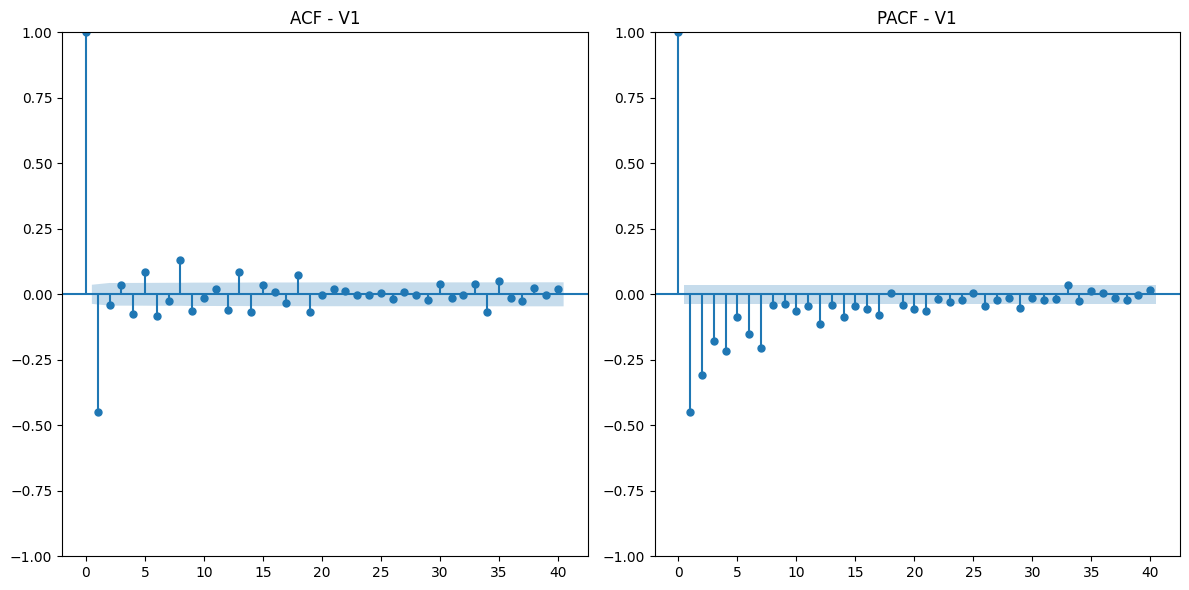

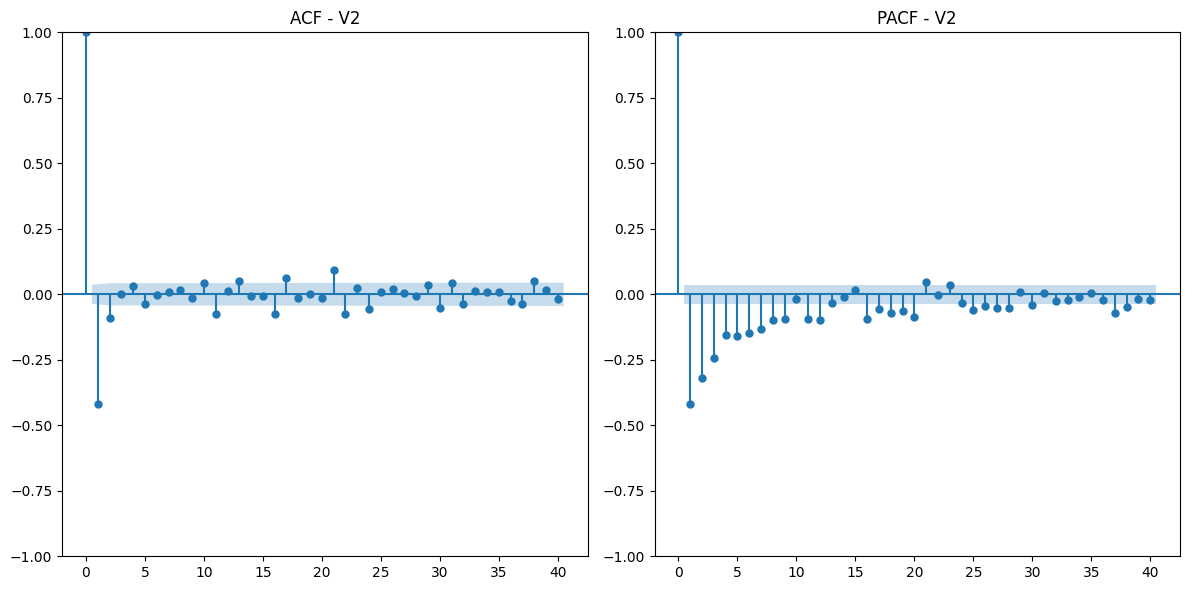

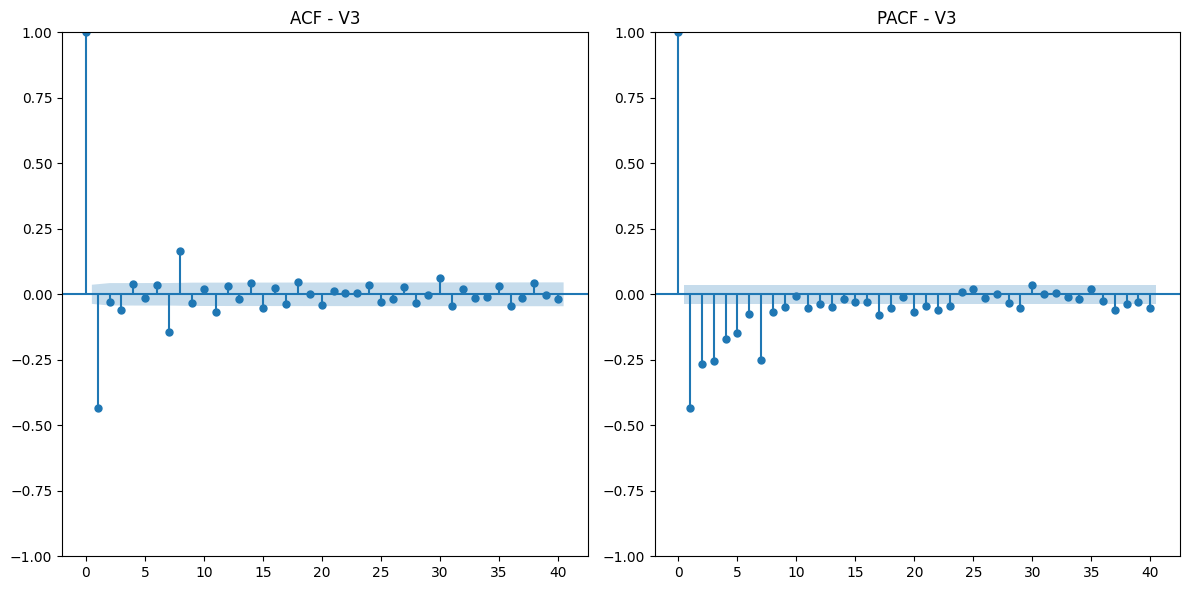

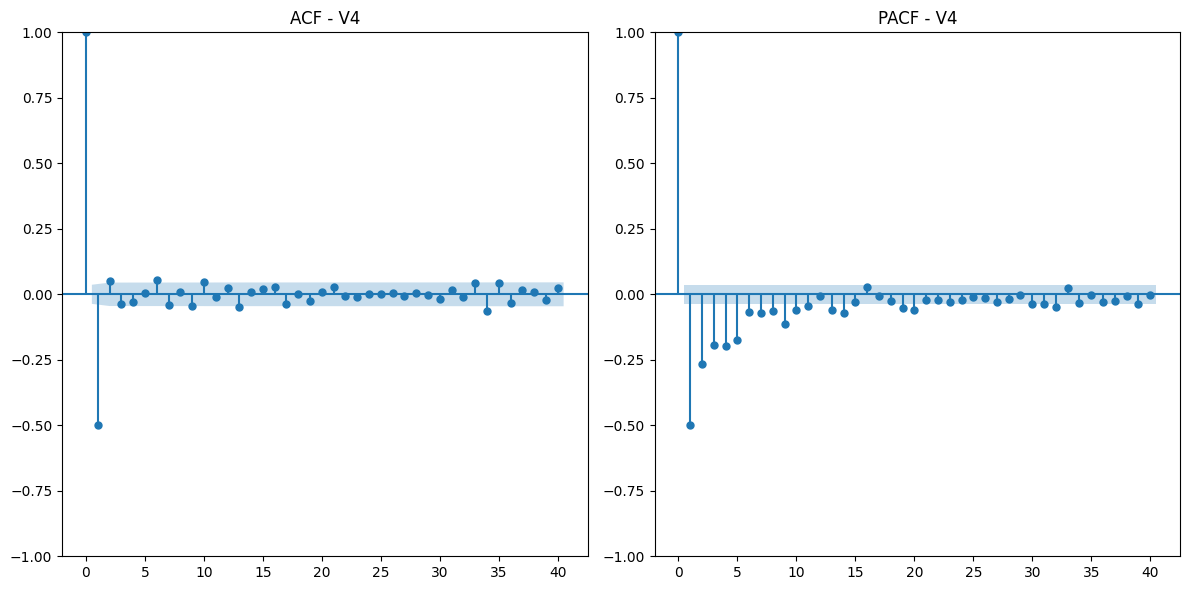

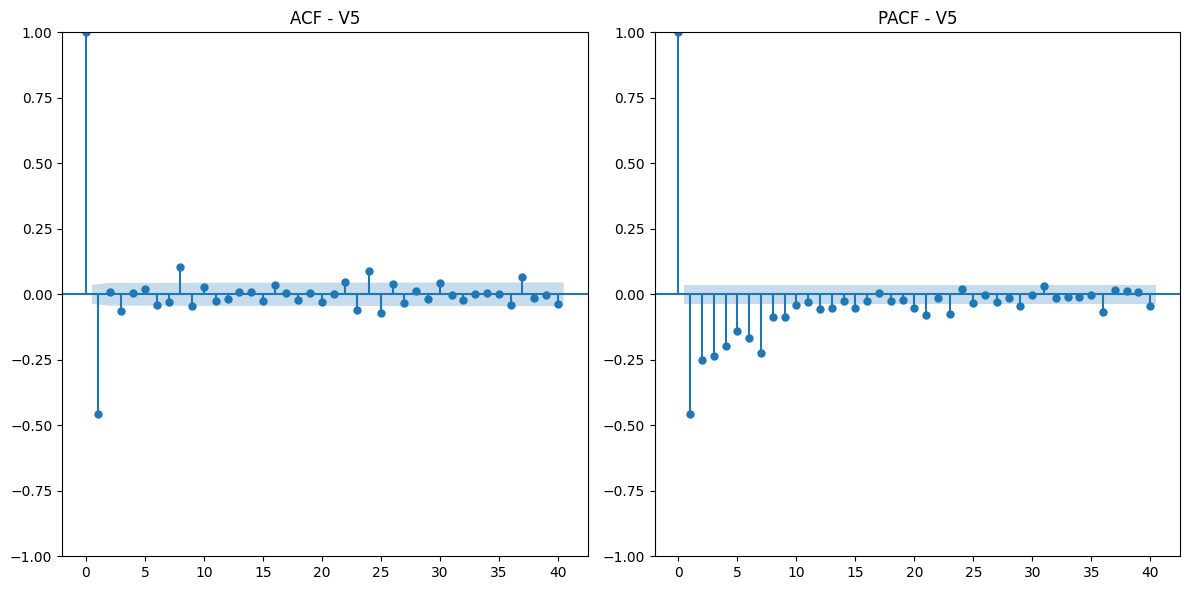

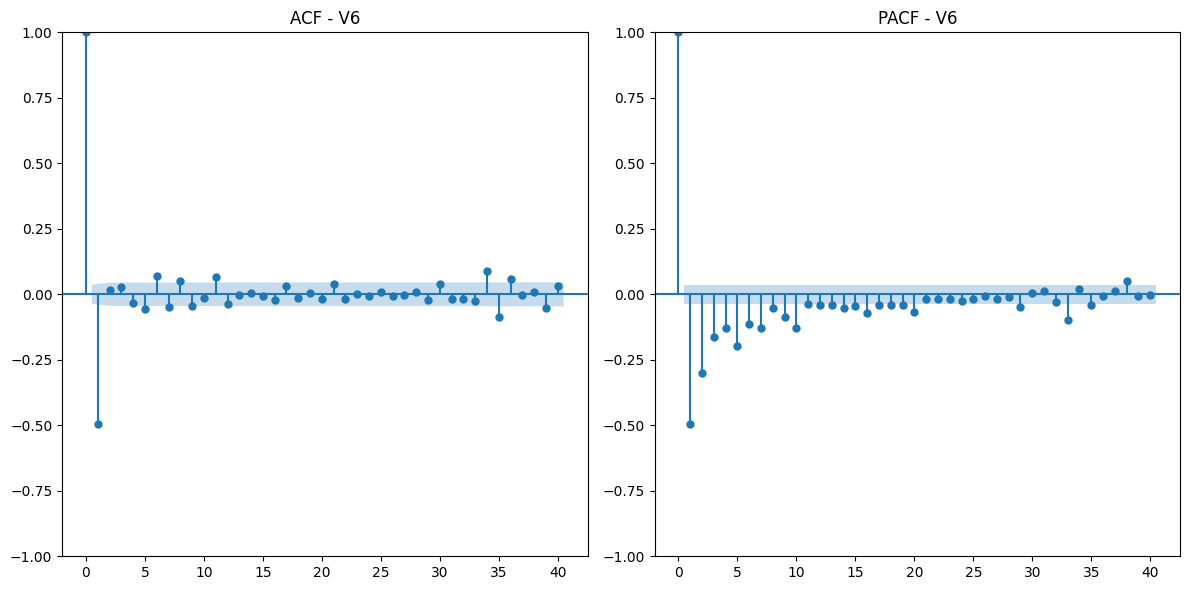

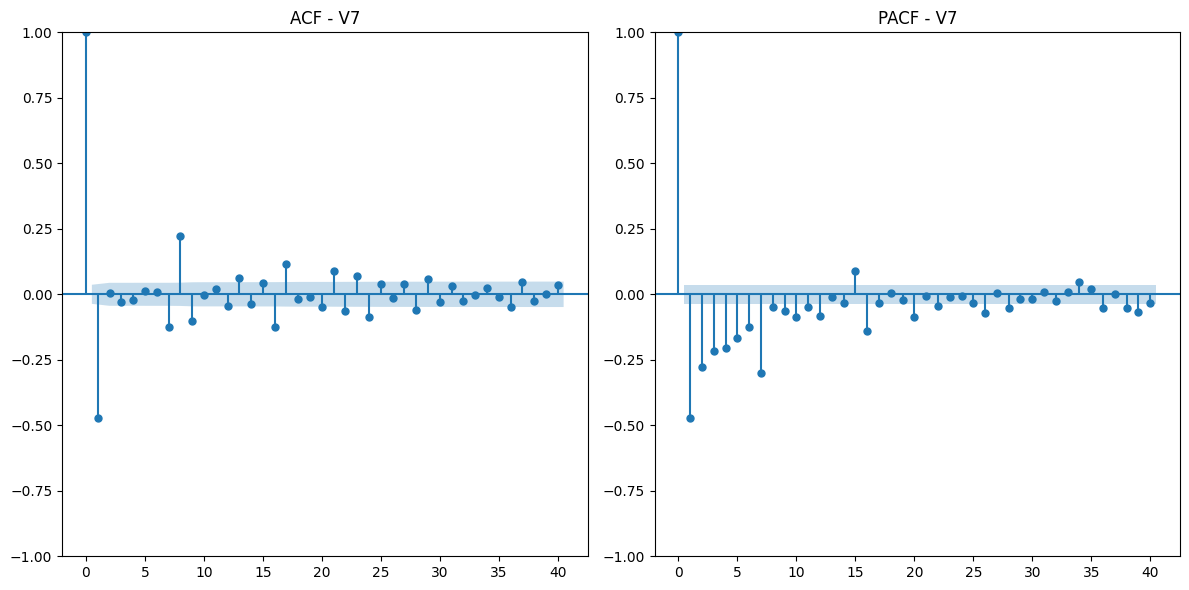

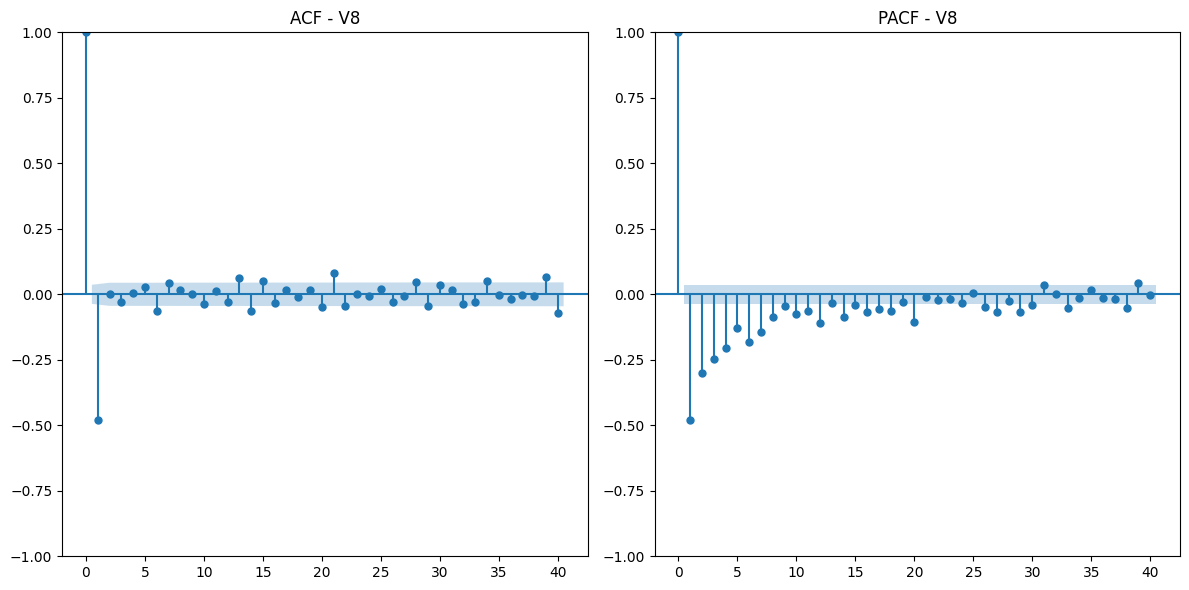

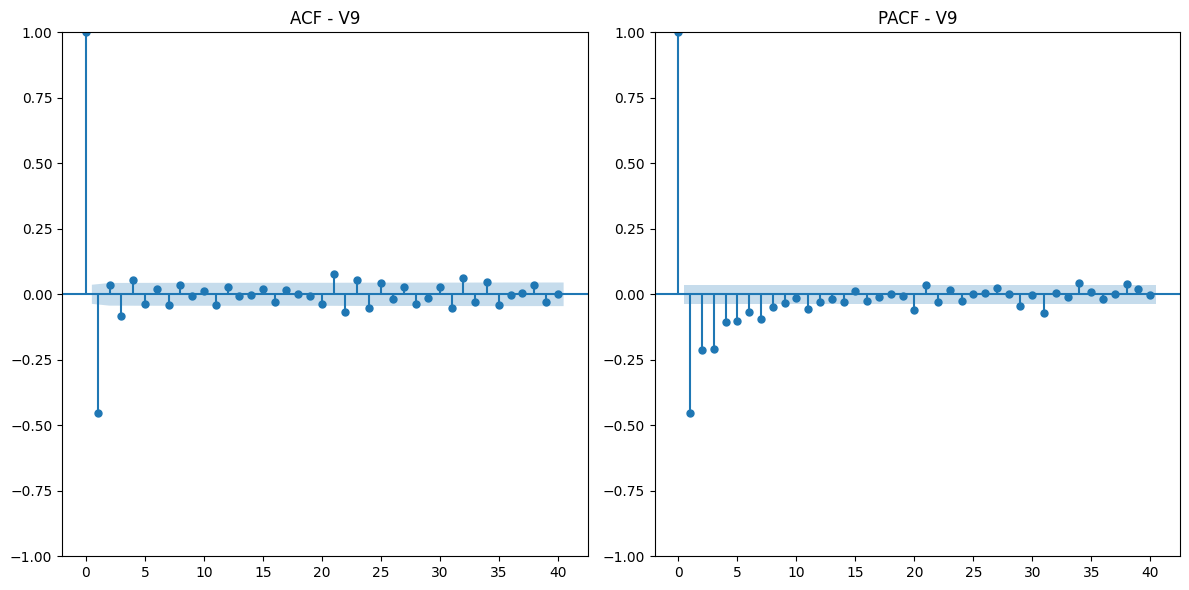

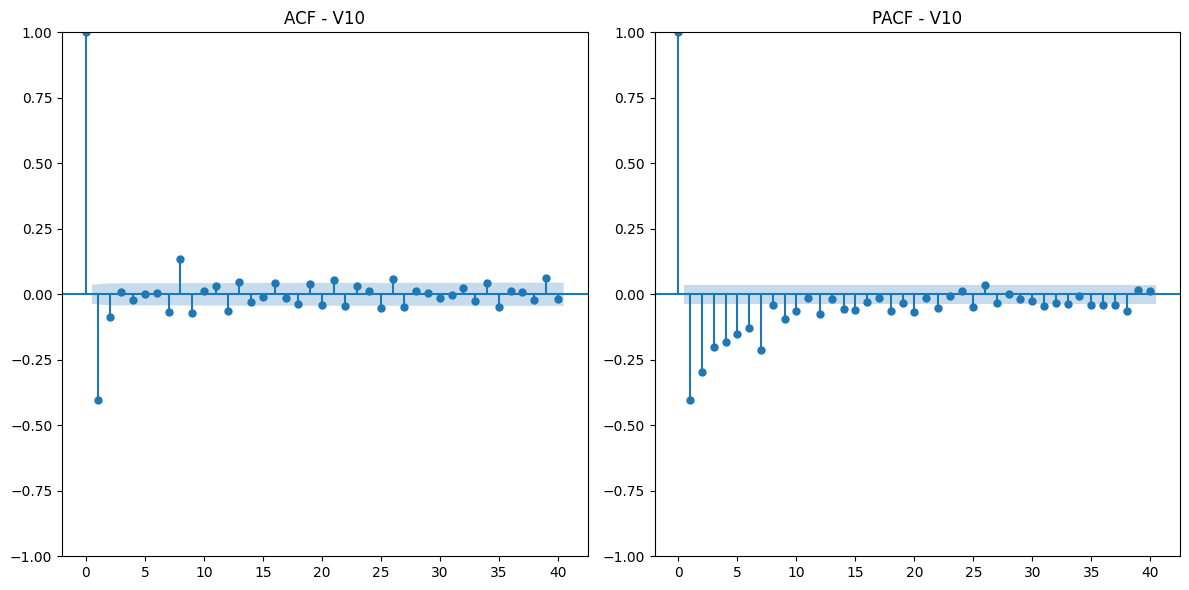

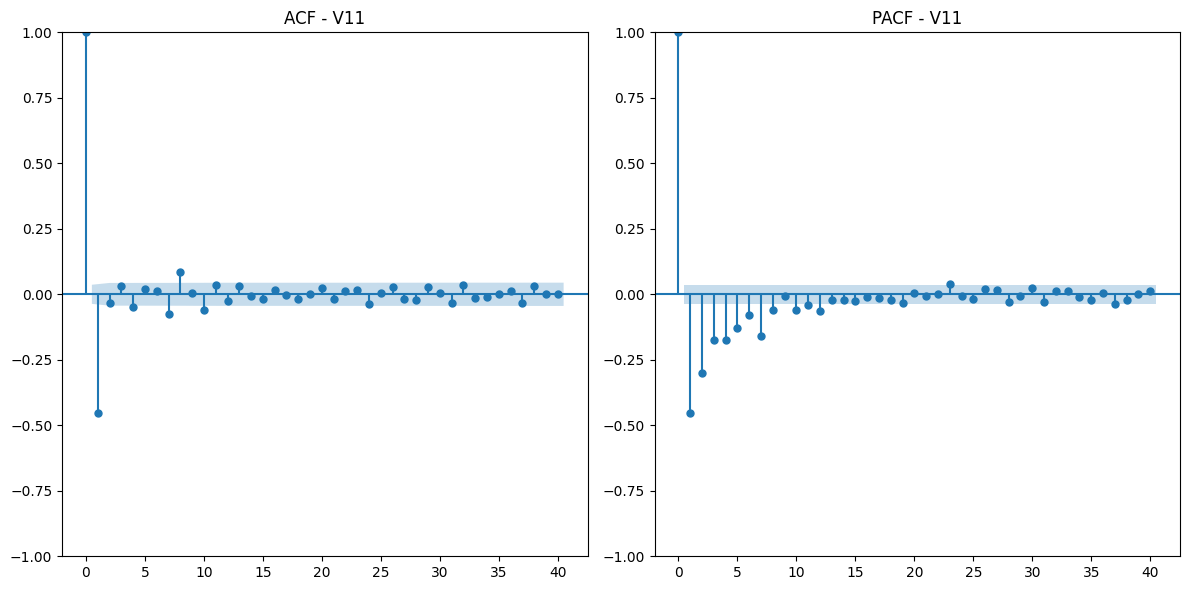

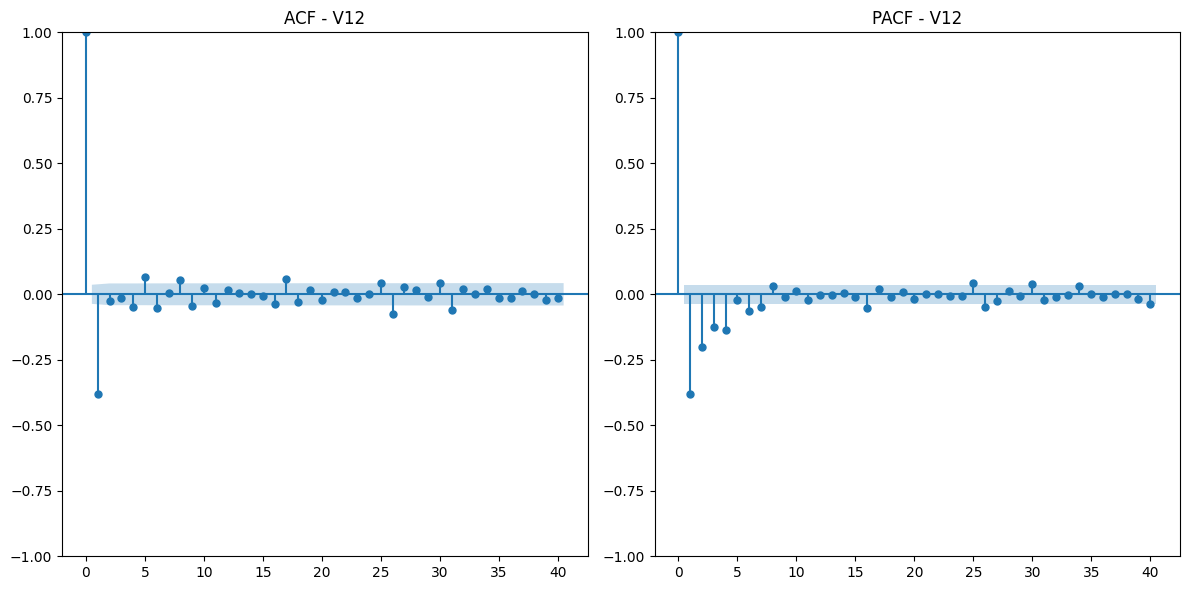

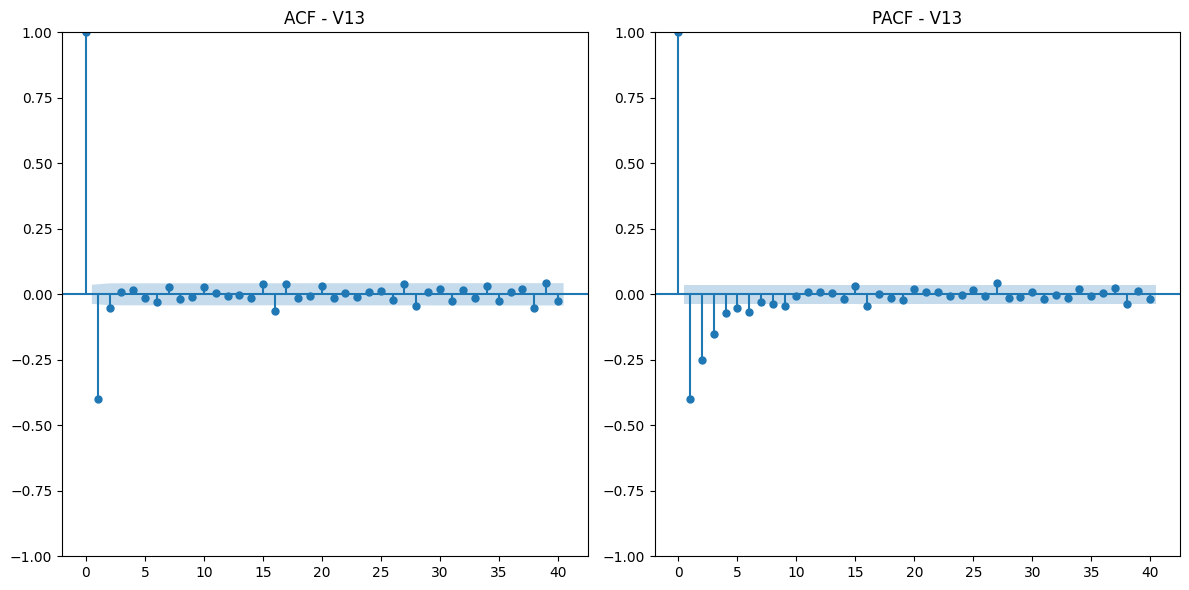

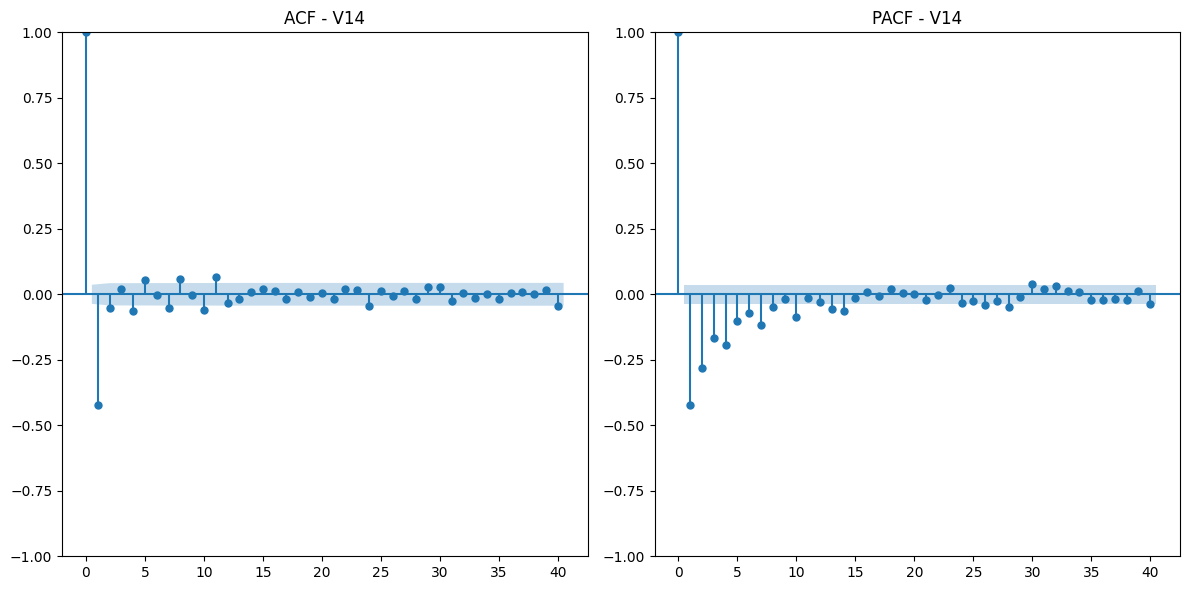

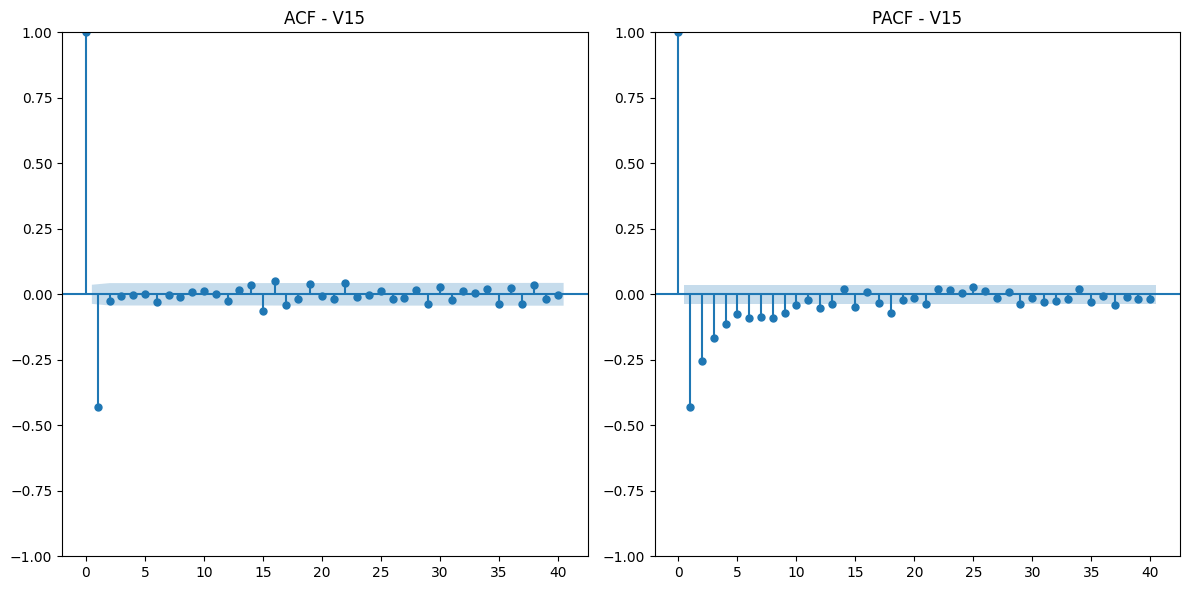

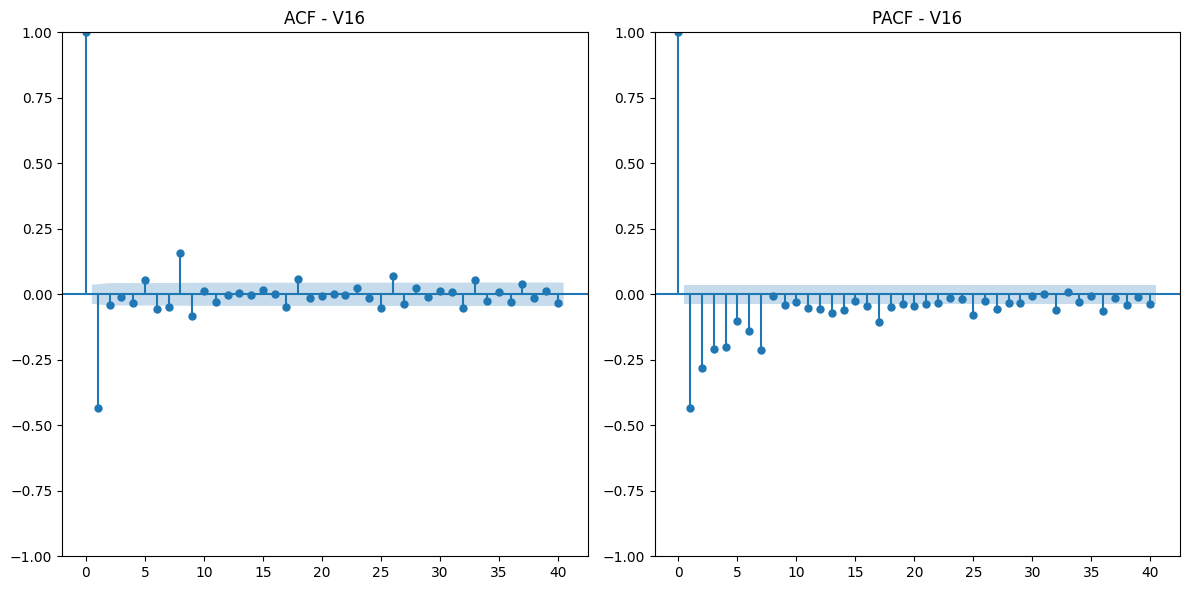

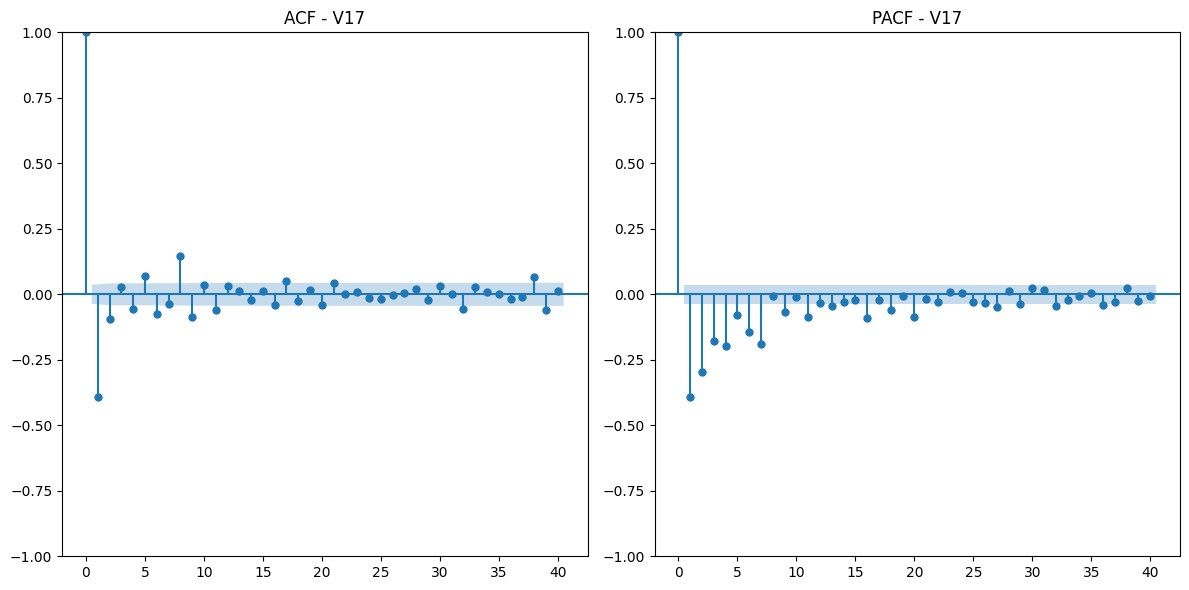

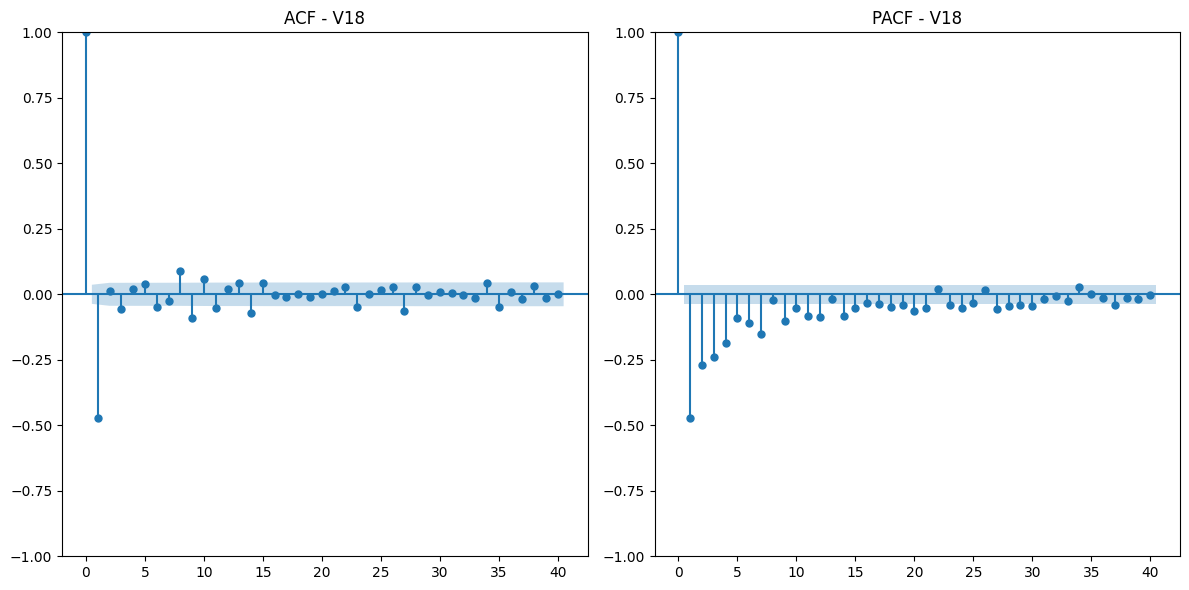

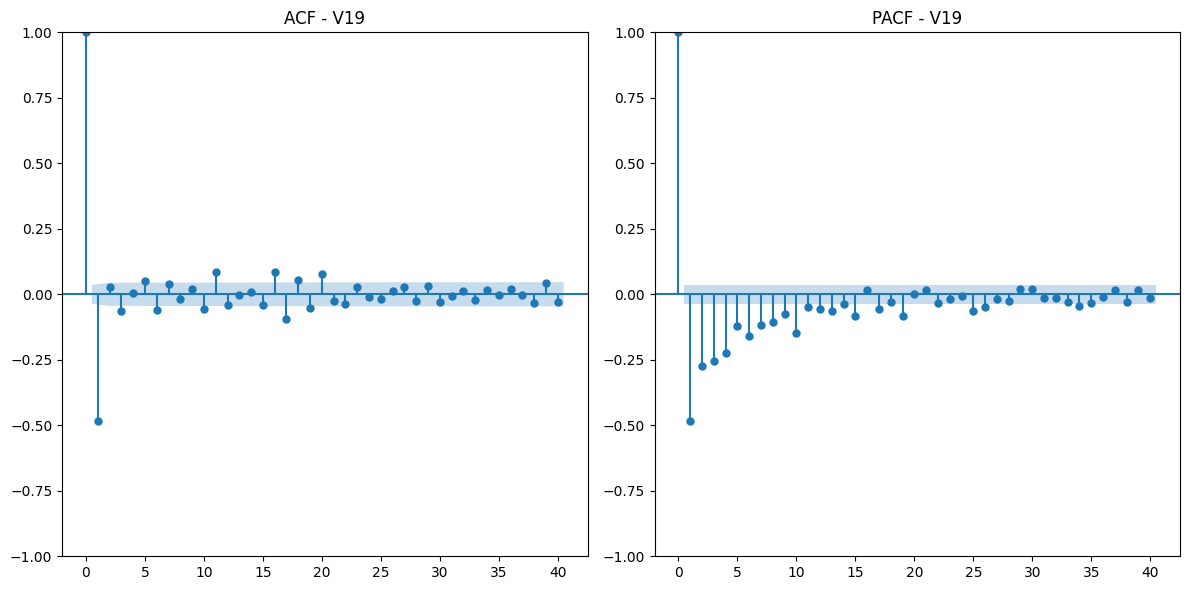

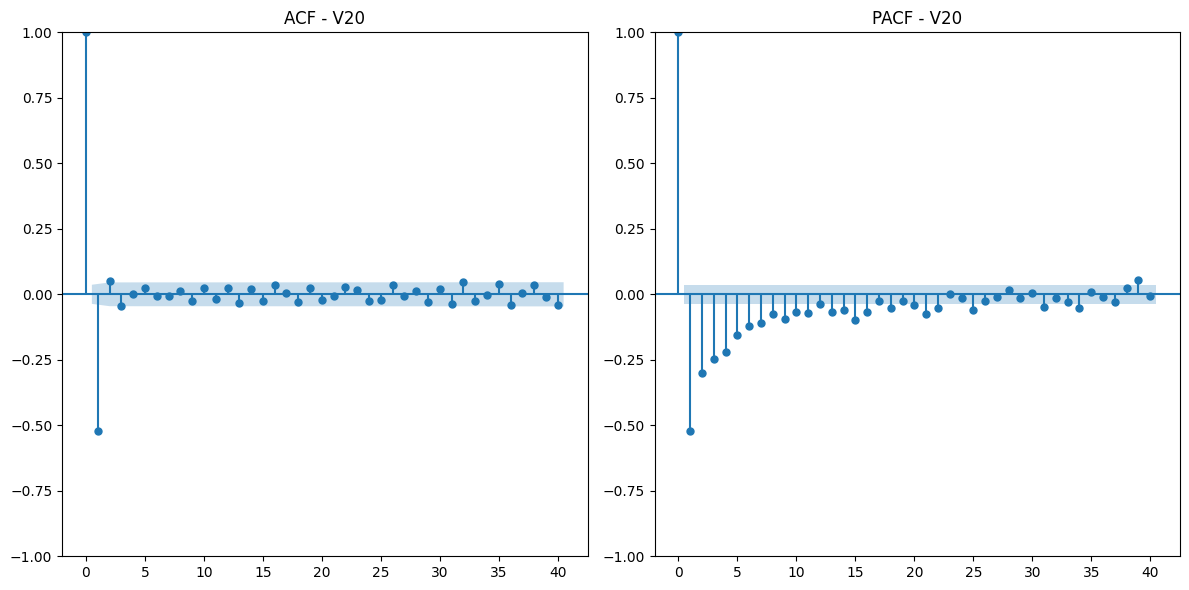

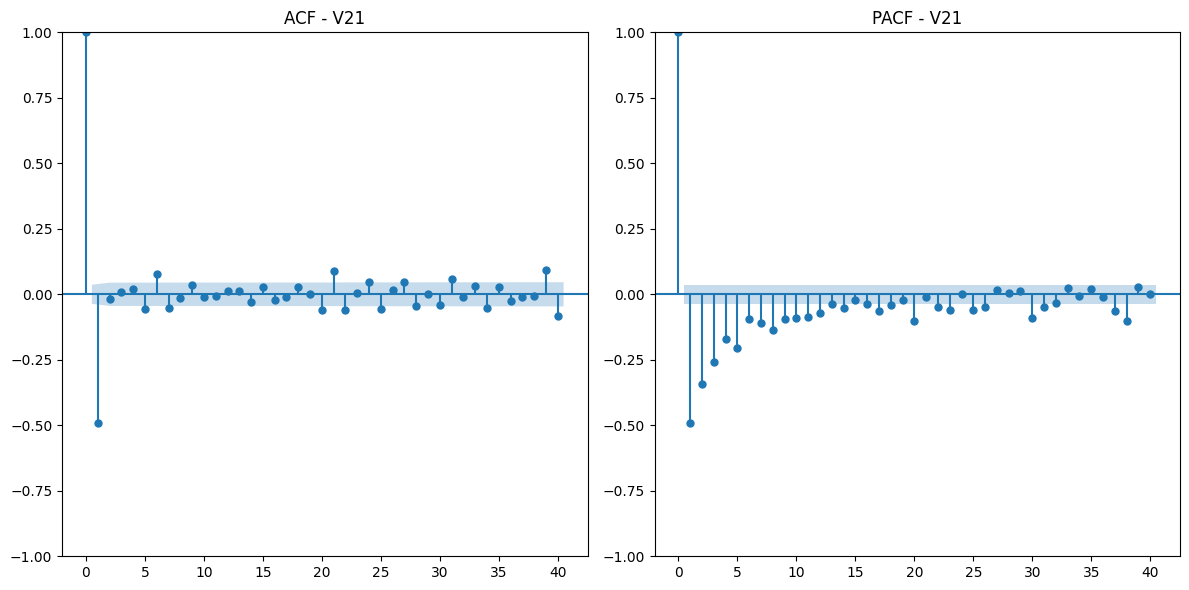

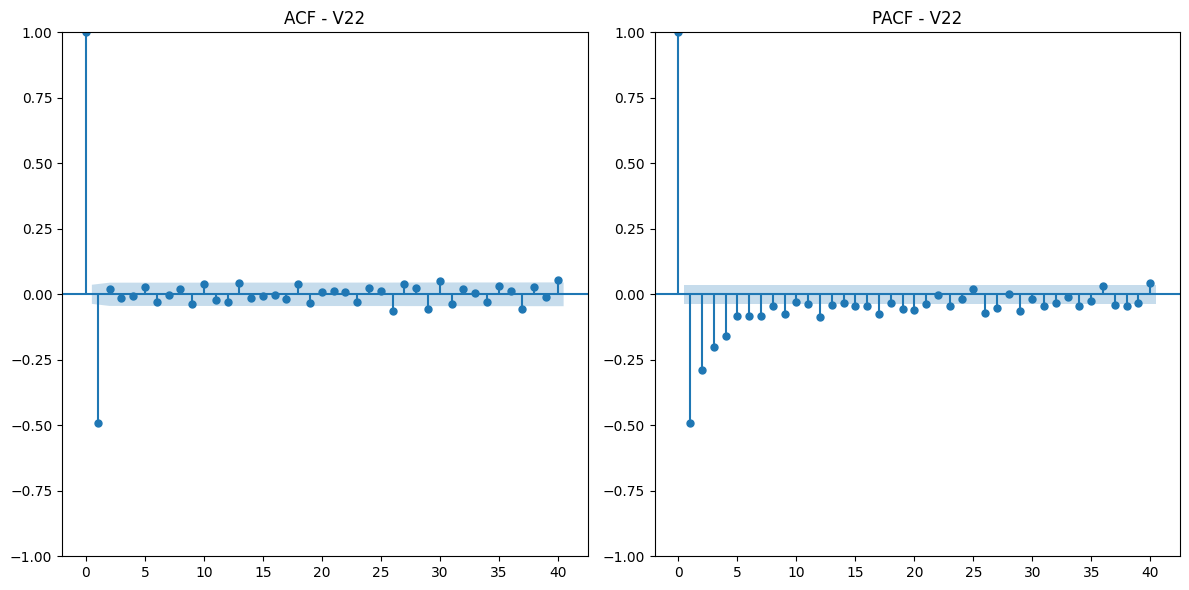

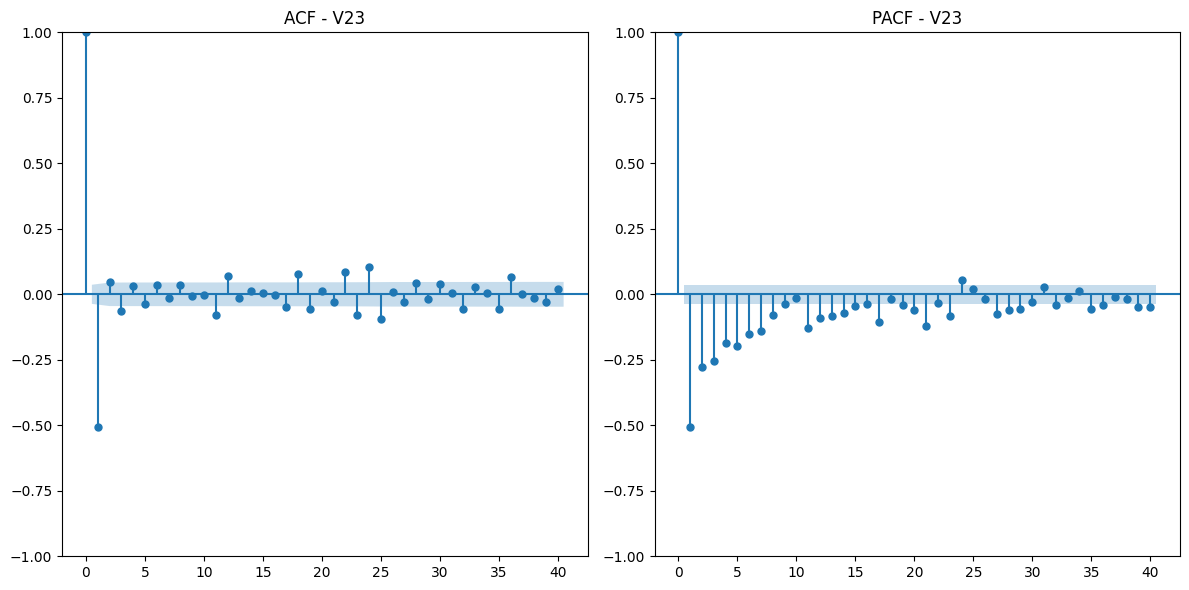

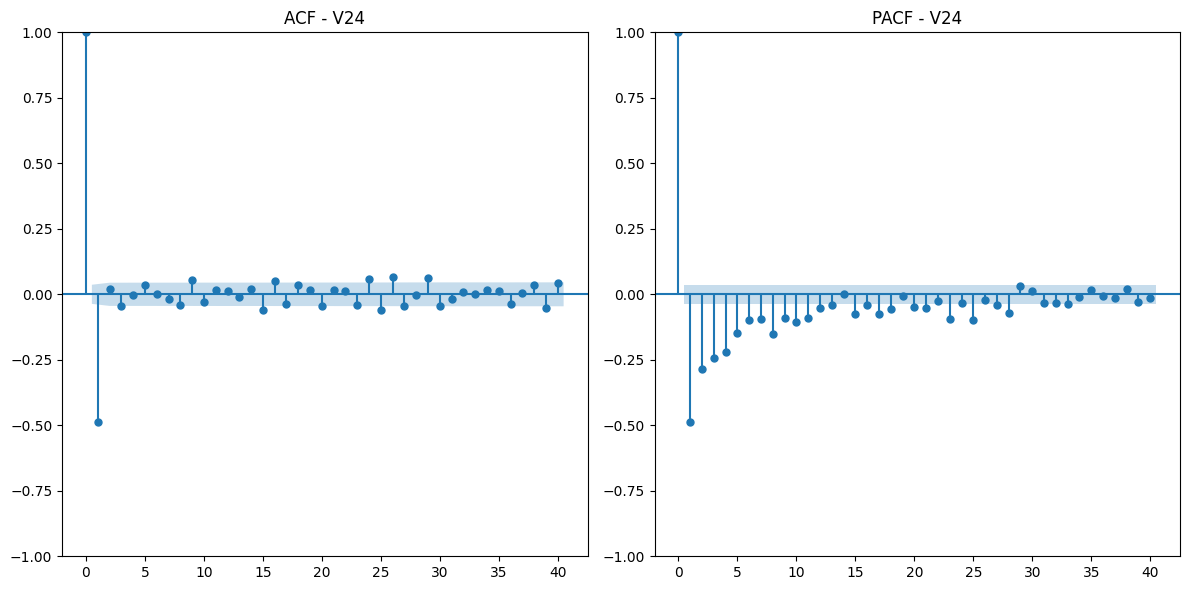

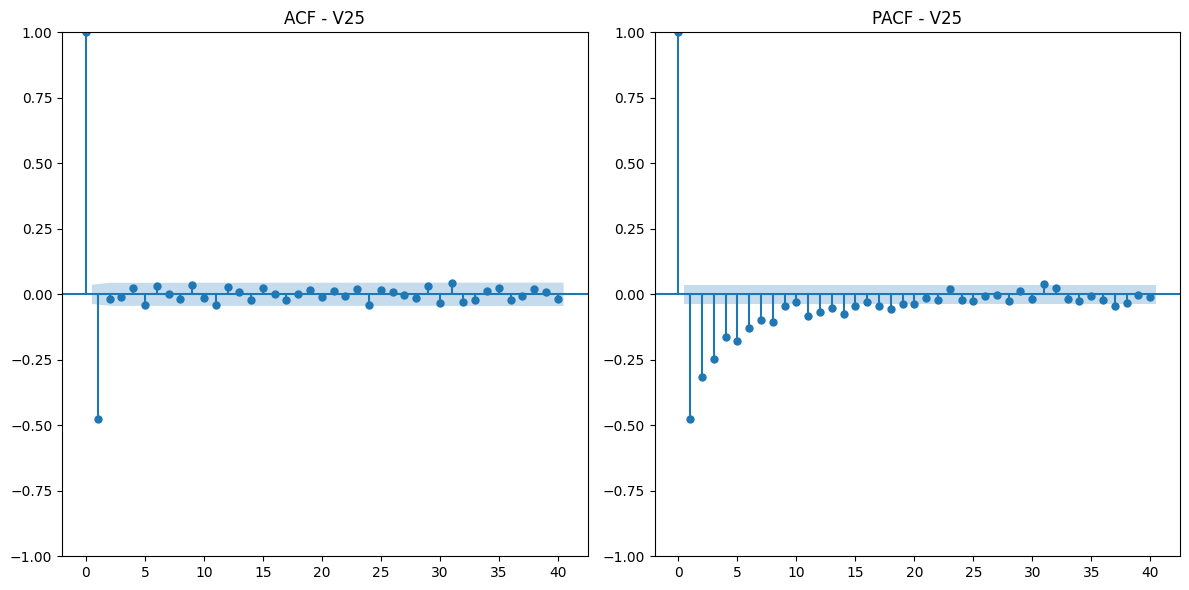

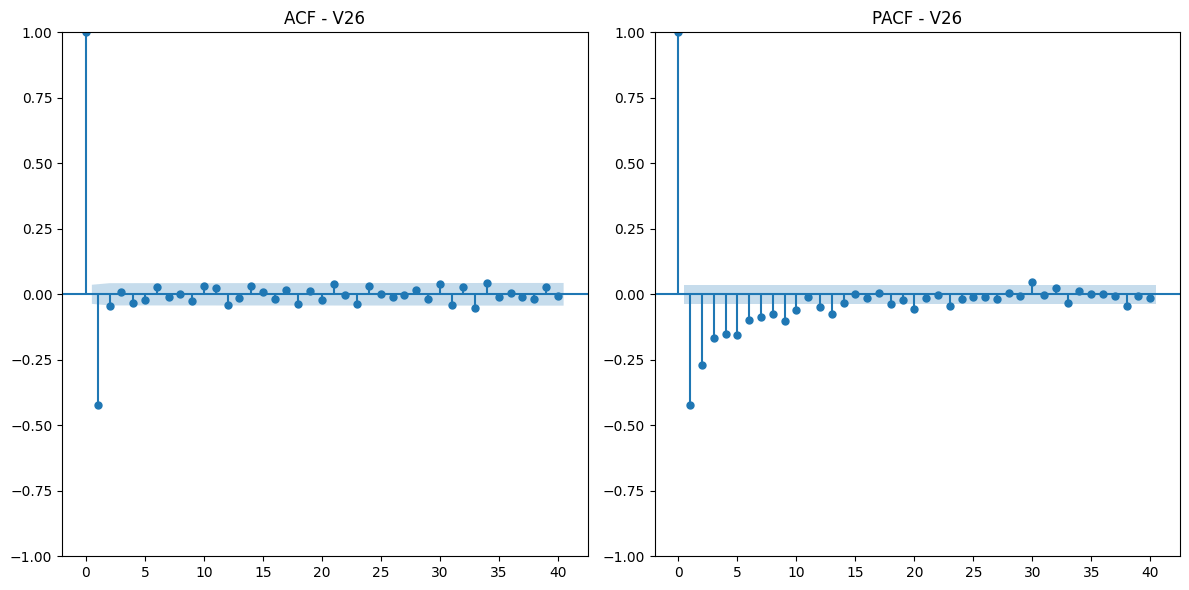

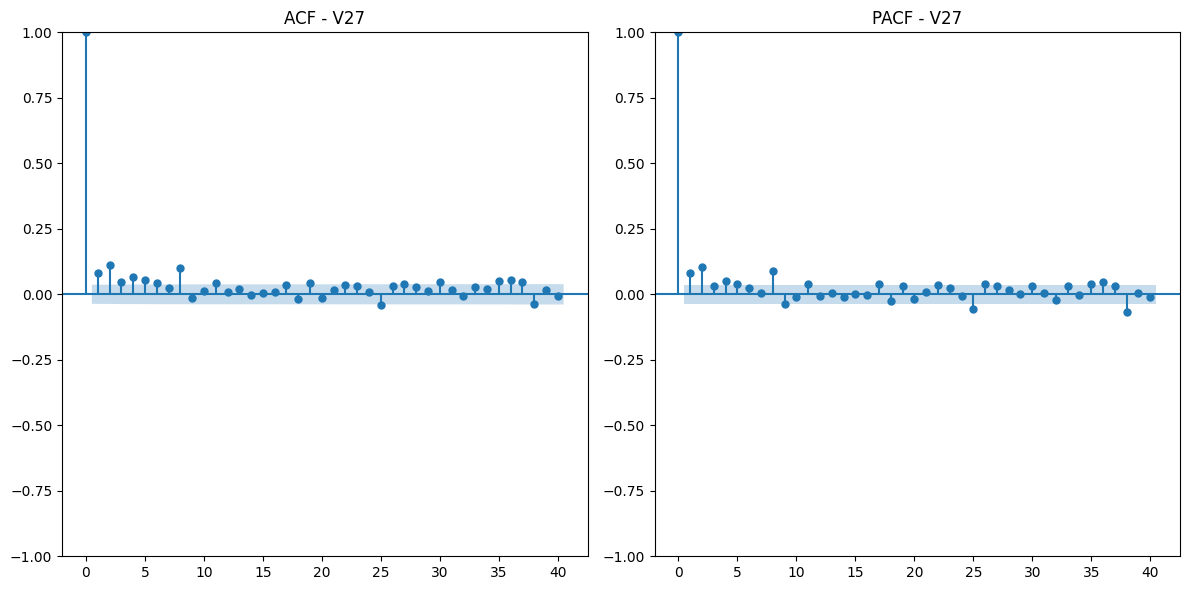

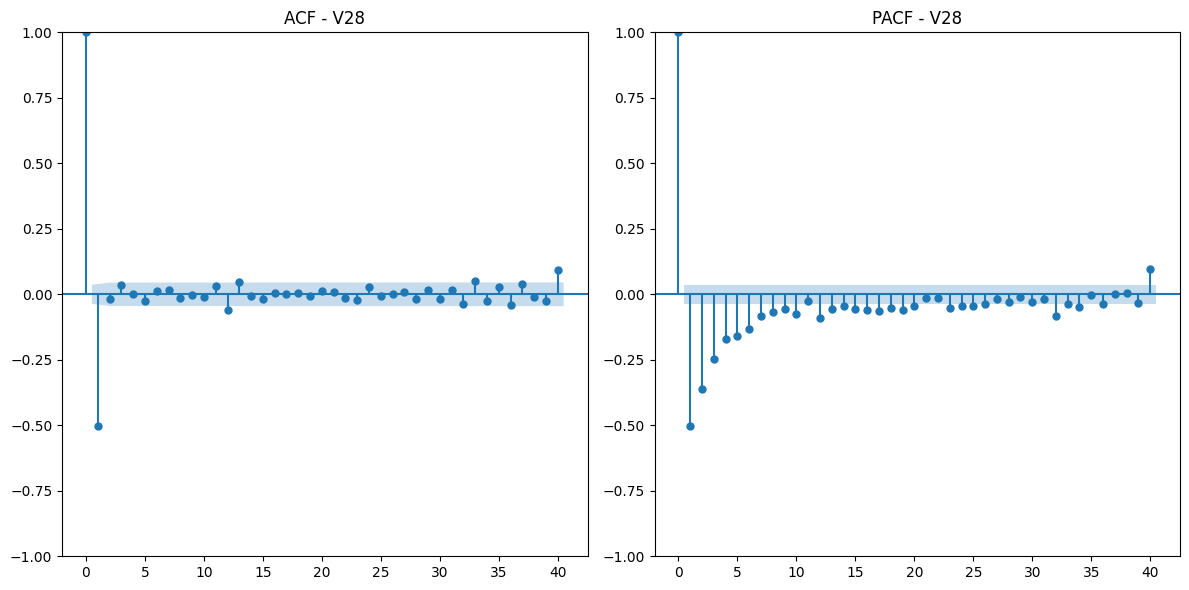

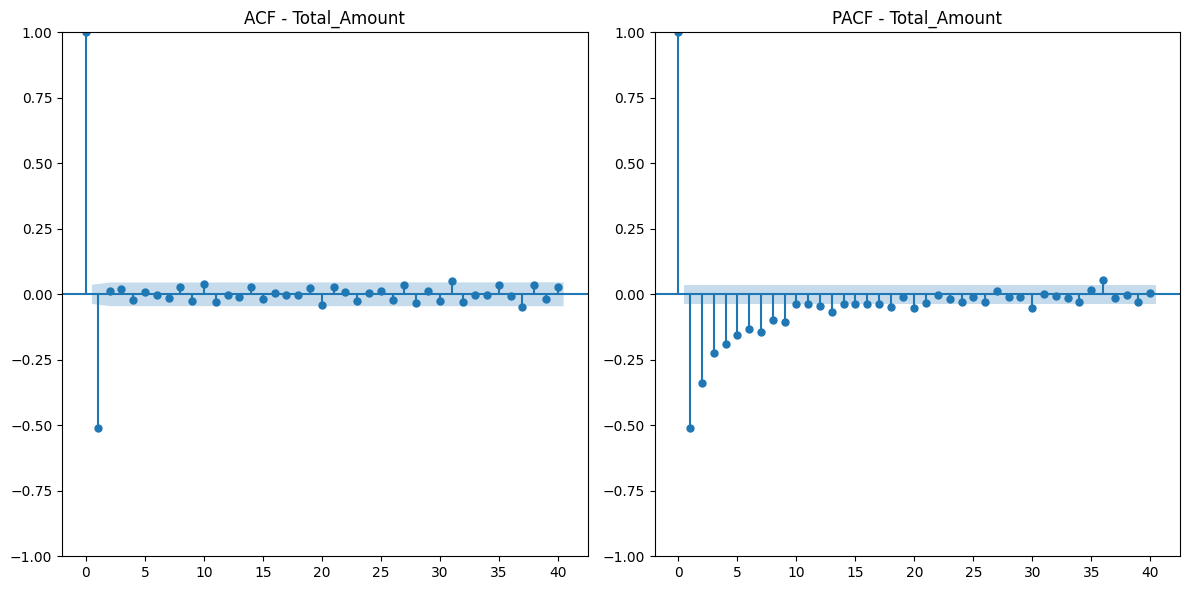

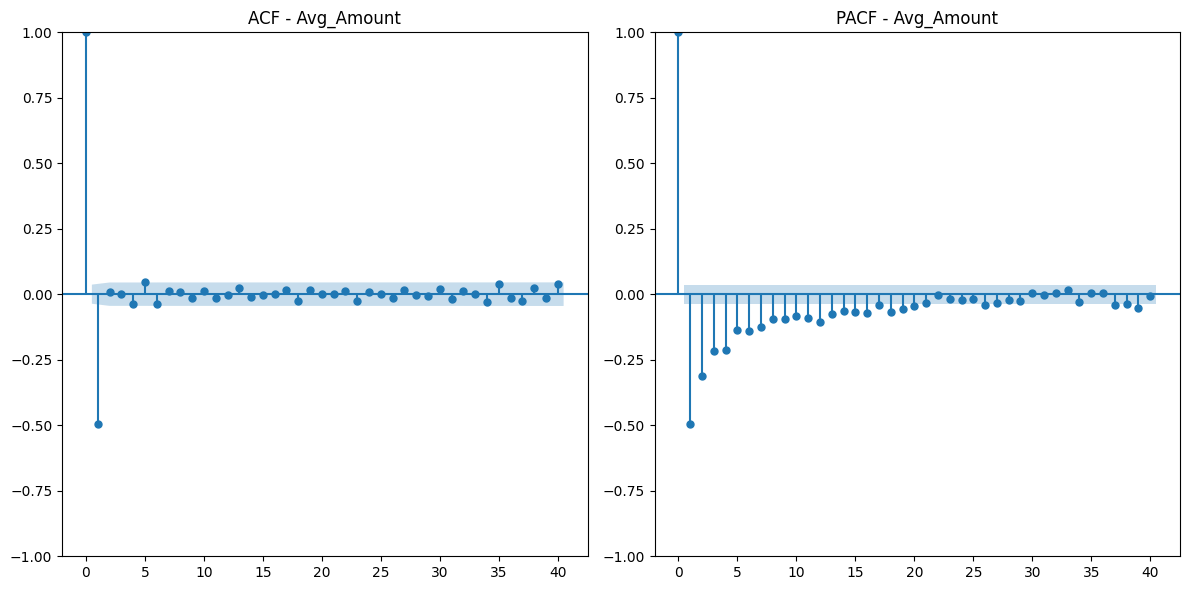

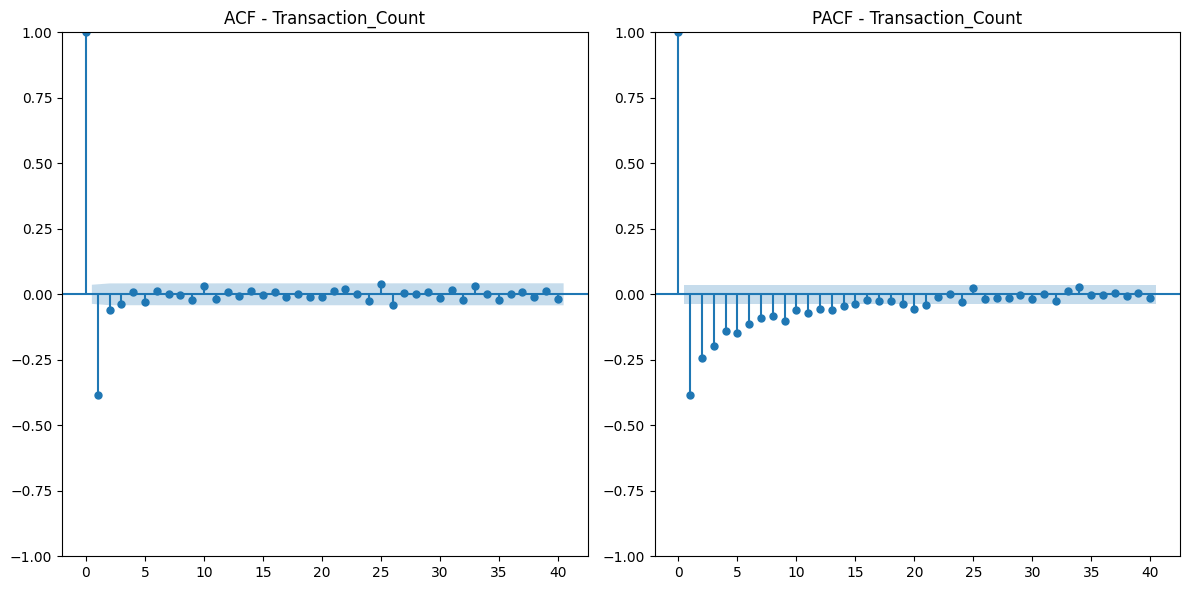

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

numeric_columns = df_actual_stationary.select_dtypes(include=['float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Plot ACF
    plt.subplot(121)
    plot_acf(df_actual_stationary[column].dropna(), lags=40, ax=plt.gca())
    plt.title(f'ACF - {column}')

    # Plot PACF
    plt.subplot(122)
    plot_pacf(df_actual_stationary[column].dropna(), lags=40, ax=plt.gca())
    plt.title(f'PACF - {column}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Save the resampled dataset to a CSV file
df_actual_stationary.to_csv("/content/drive/MyDrive/project_stationary_forNOW_1.csv", index=False)

# Optional: Show the path where the file is saved
print("The resampled dataset has been saved as 'project_stationary_forNOW_1.csv'.")

The resampled dataset has been saved as 'project_stationary_forNOW_1.csv'.


Seasonal decomposition for: V1


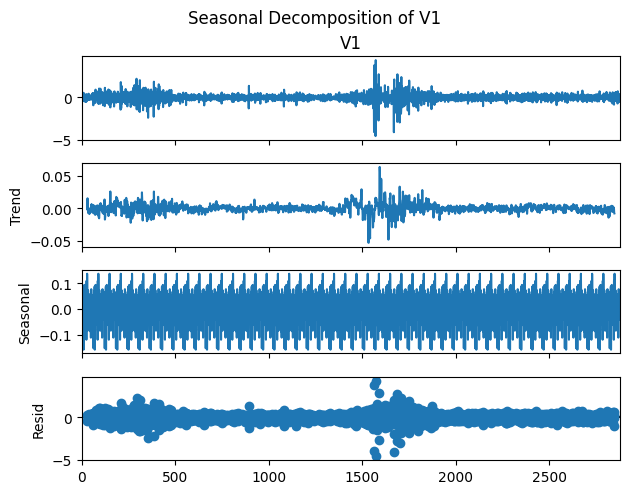

Seasonal decomposition for: V2


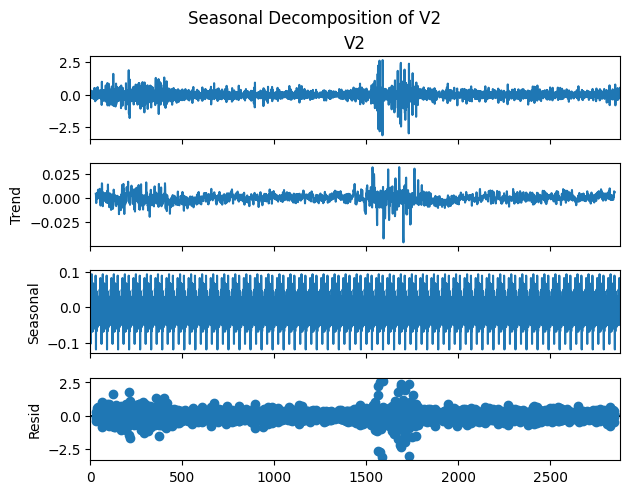

Seasonal decomposition for: V3


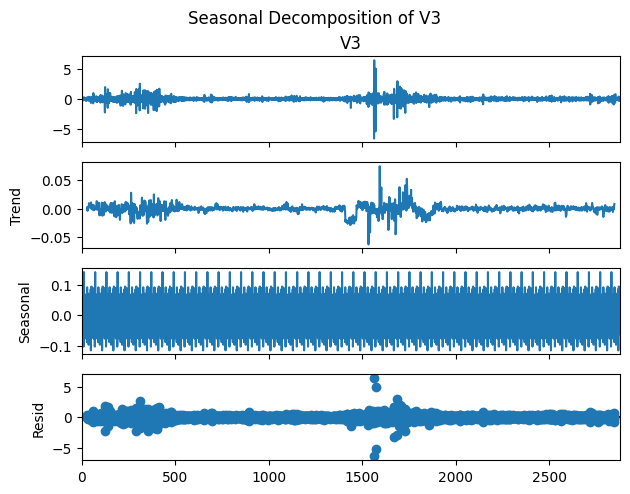

Seasonal decomposition for: V4


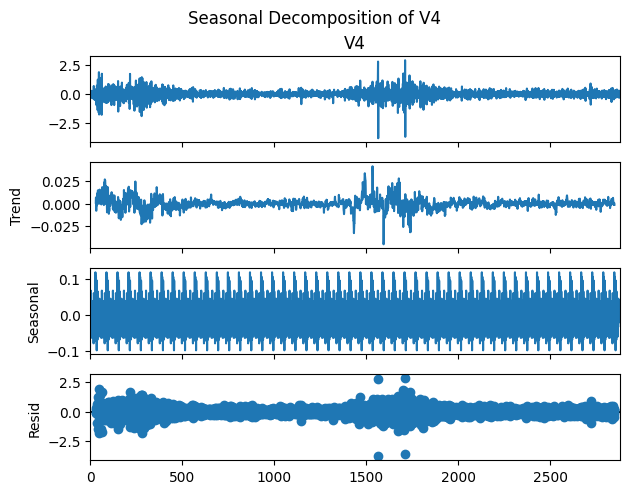

Seasonal decomposition for: V5


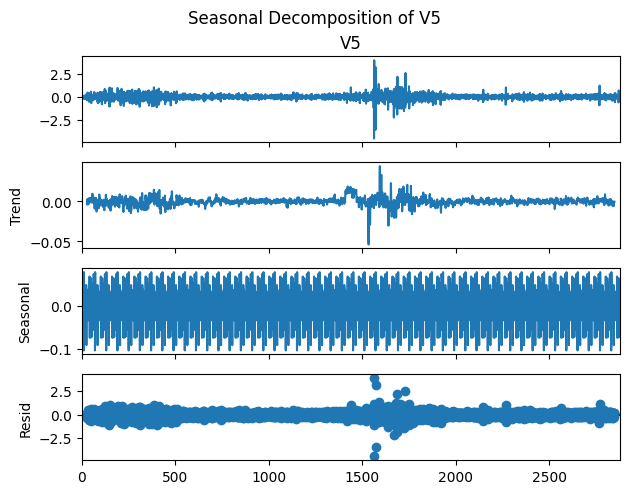

Seasonal decomposition for: V6


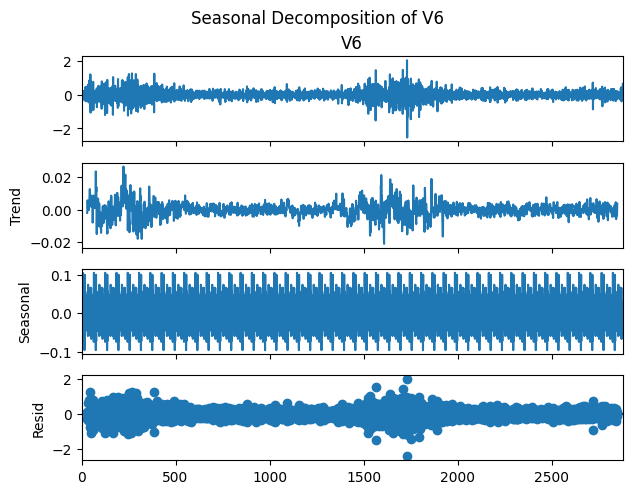

Seasonal decomposition for: V7


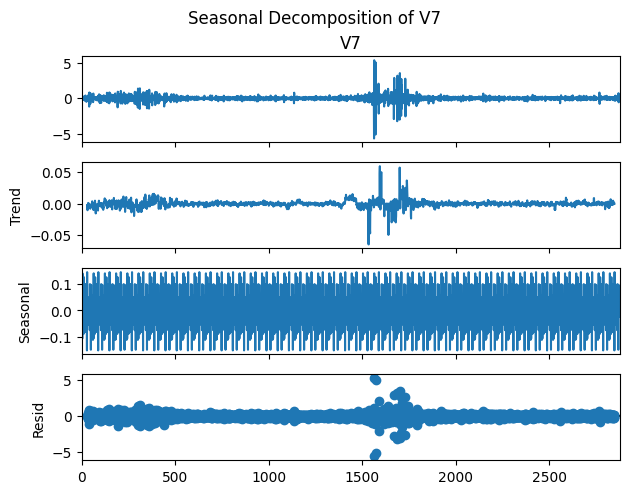

Seasonal decomposition for: V8


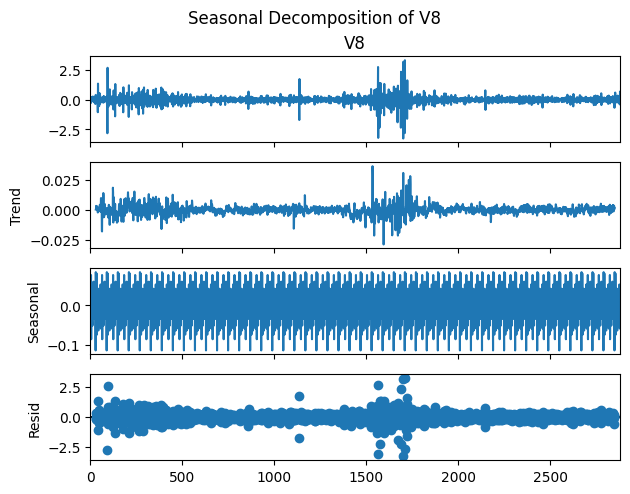

Seasonal decomposition for: V9


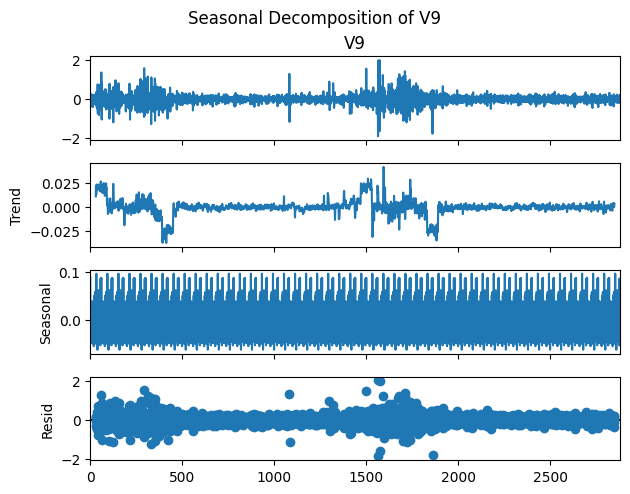

Seasonal decomposition for: V10


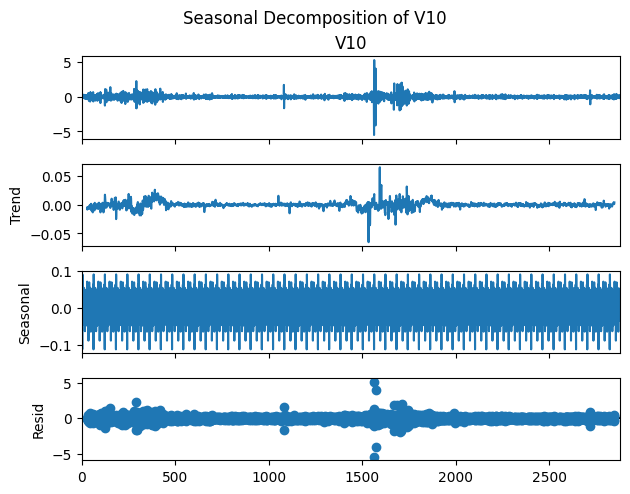

Seasonal decomposition for: V11


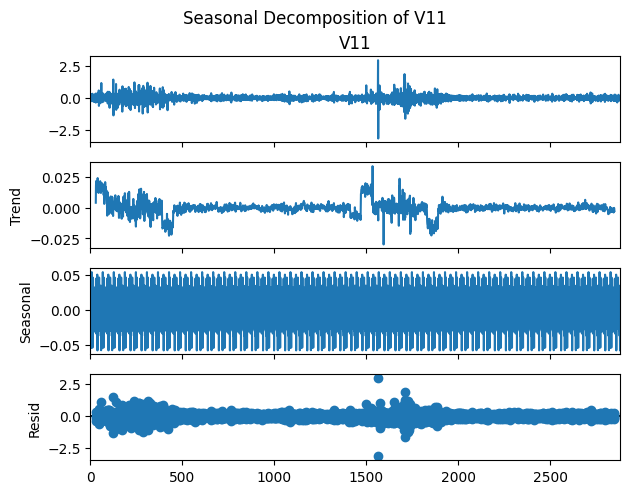

Seasonal decomposition for: V12


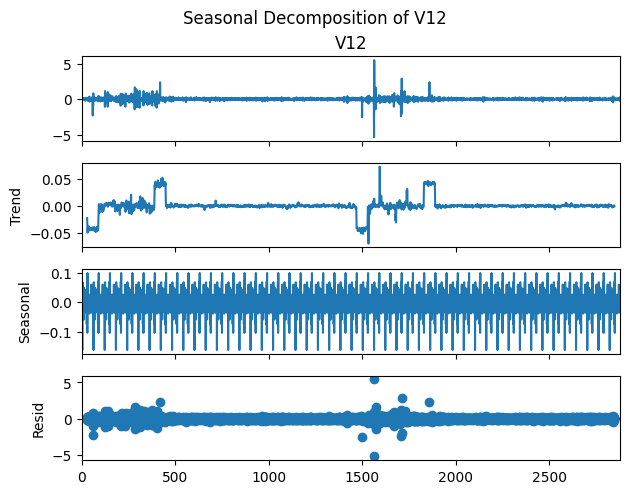

Seasonal decomposition for: V13


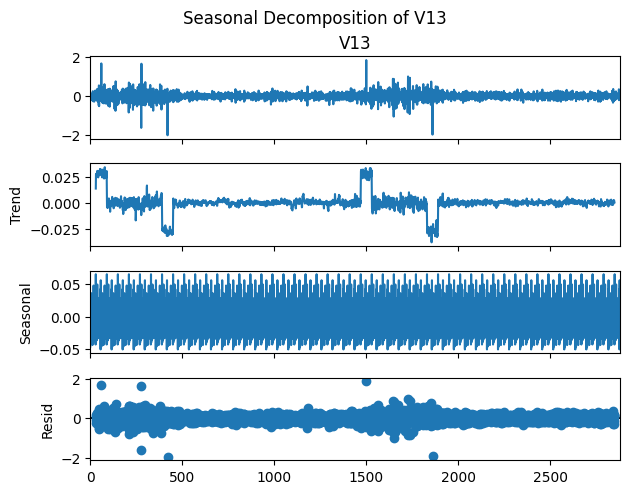

Seasonal decomposition for: V14


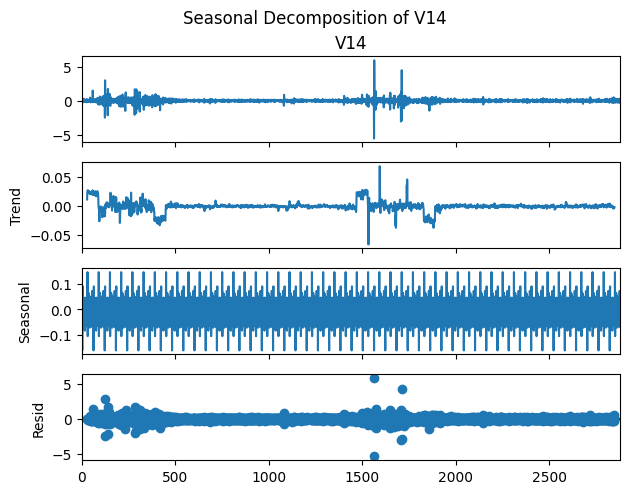

Seasonal decomposition for: V15


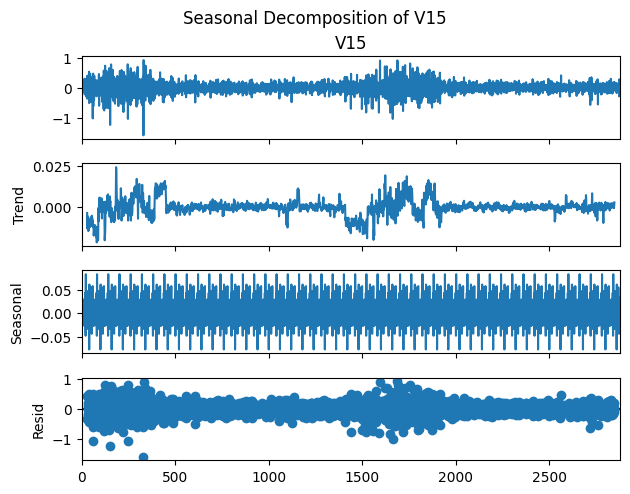

Seasonal decomposition for: V16


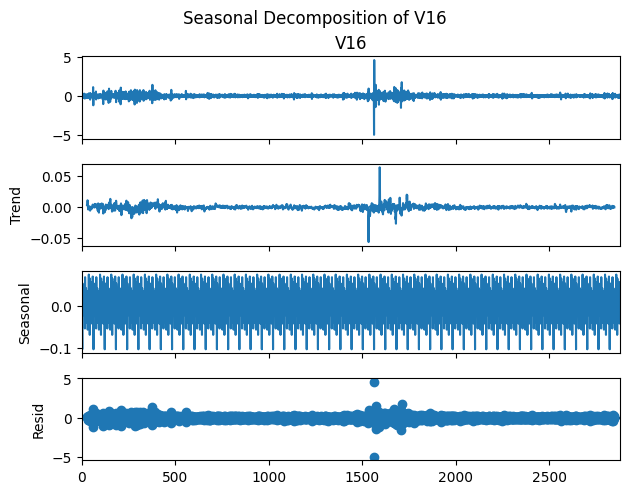

Seasonal decomposition for: V17


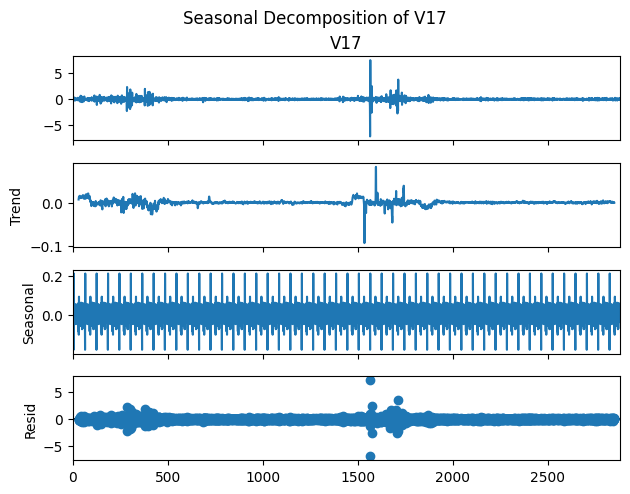

Seasonal decomposition for: V18


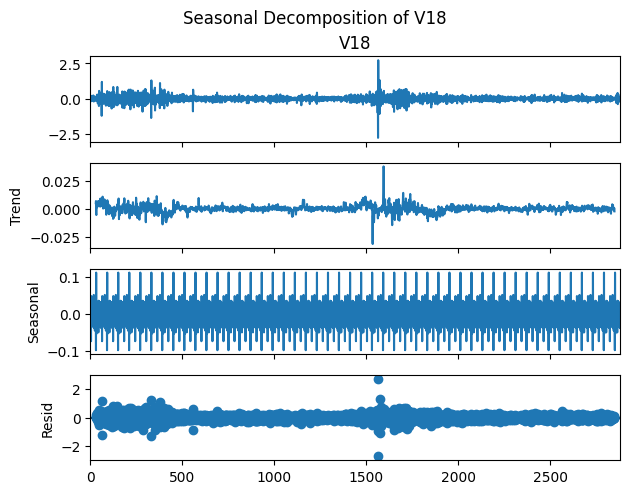

Seasonal decomposition for: V19


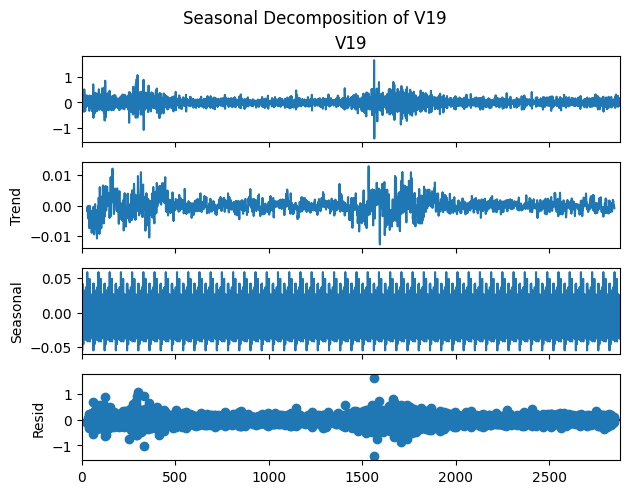

Seasonal decomposition for: V20


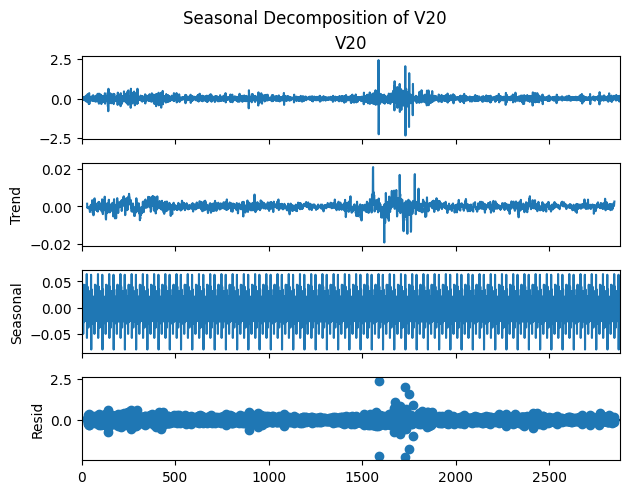

Seasonal decomposition for: V21


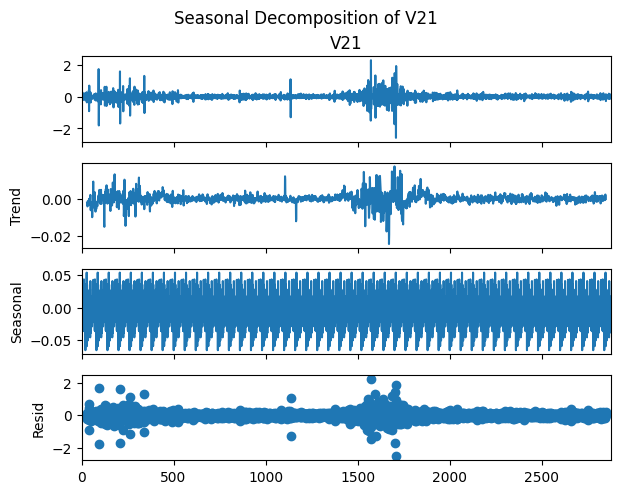

Seasonal decomposition for: V22


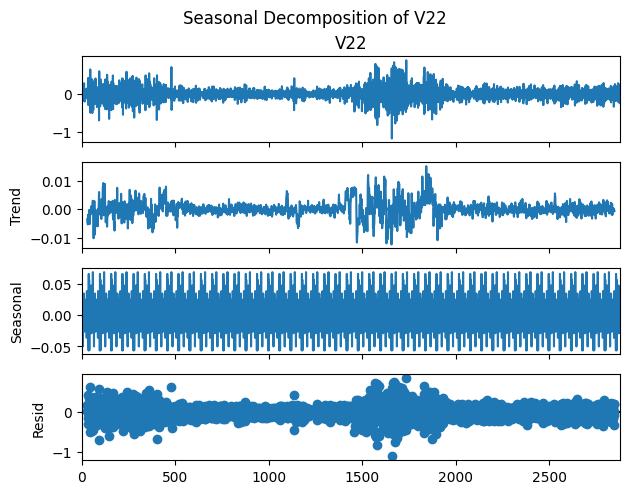

Seasonal decomposition for: V23


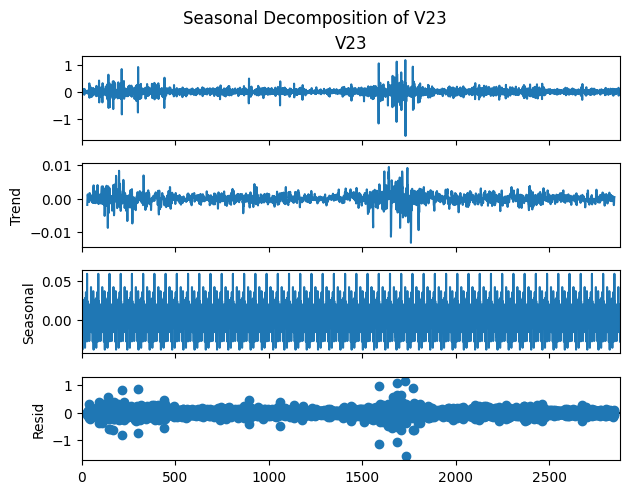

Seasonal decomposition for: V24


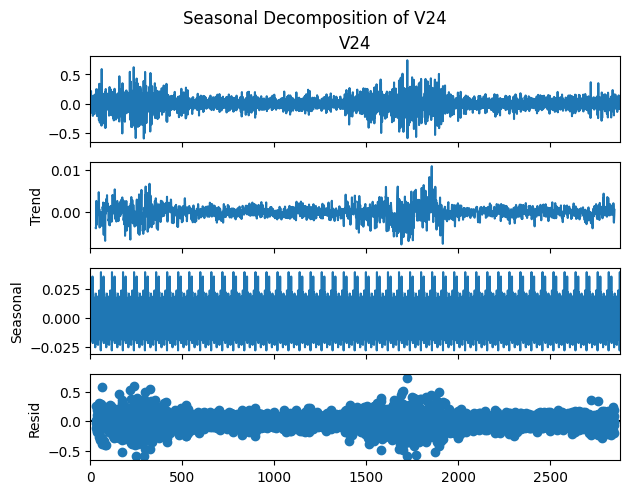

Seasonal decomposition for: V25


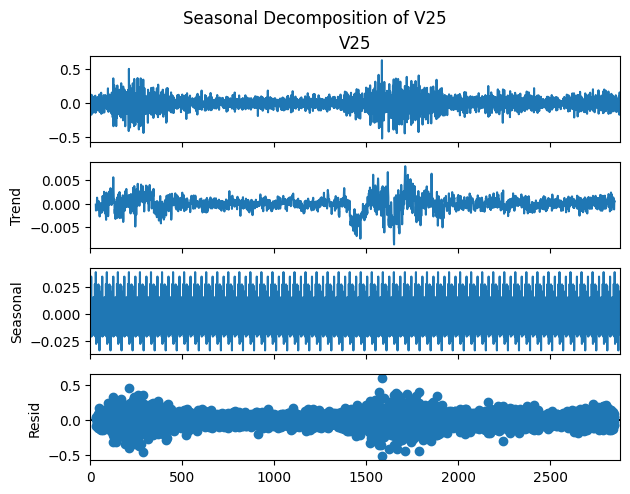

Seasonal decomposition for: V26


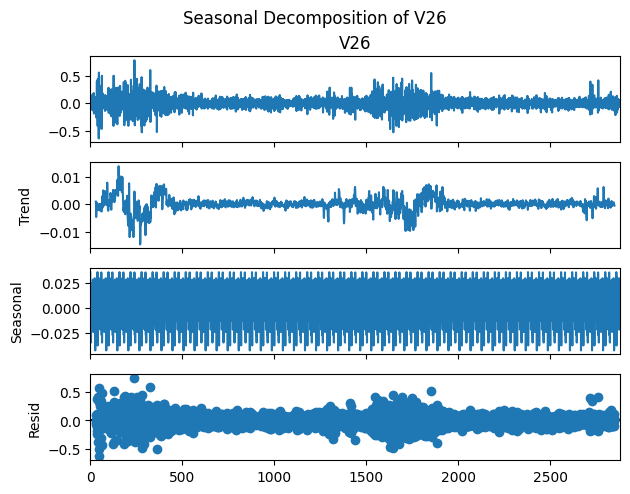

Seasonal decomposition for: V27


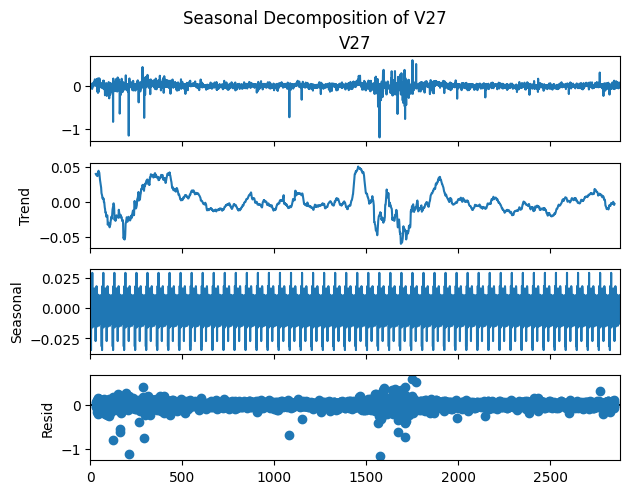

Seasonal decomposition for: V28


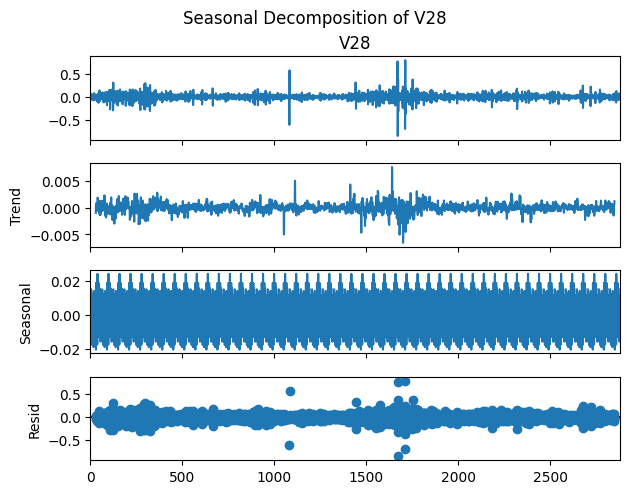

Seasonal decomposition for: Total_Amount


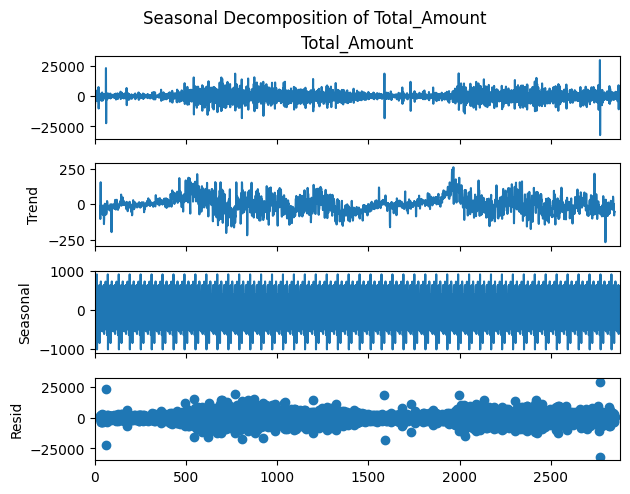

Seasonal decomposition for: Avg_Amount


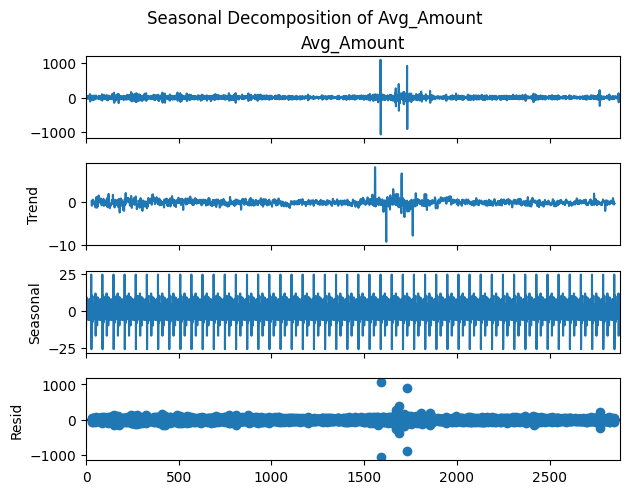

Seasonal decomposition for: Transaction_Count


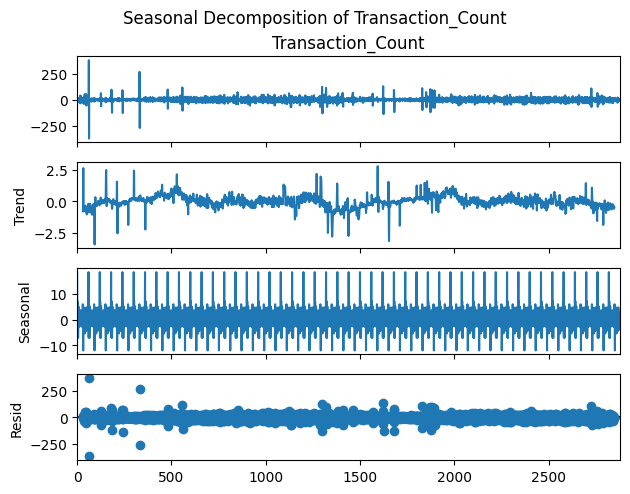

Seasonal decomposition for: Fraud_Count


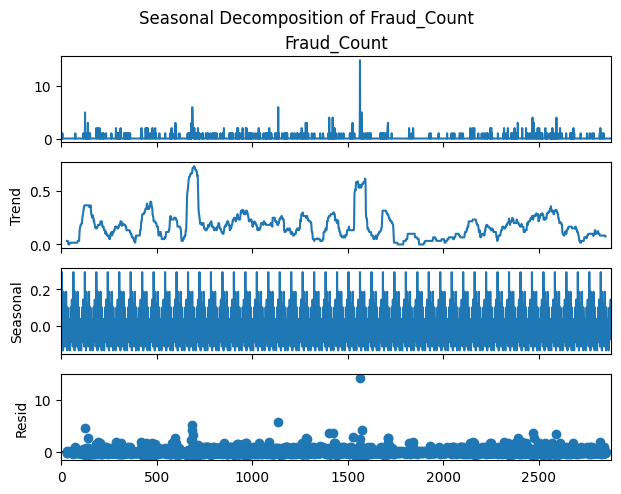

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def decompose_series(data):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            print(f"Seasonal decomposition for: {column}")

            decomposition = seasonal_decompose(data[column], model='additive', period=60)  # Adjust the period if necessary

           
            decomposition.plot()
            plt.suptitle(f'Seasonal Decomposition of {column}', y=1.02)
            plt.show()


decompose_series(df_actual_stationary)


In [ ]:
df_actual_stationary = pd.read_csv(r"/content/drive/MyDrive/project_stationary_forNOW_1.csv")

print(df_actual_stationary.head())

    Time_Timedelta        V1        V2        V3        V4        V5  \
0  0 days 00:00:00 -0.214505  0.081420 -0.146862 -0.078612 -0.316172   
1  0 days 00:01:00 -0.214505  0.081420 -0.146862 -0.078612 -0.316172   
2  0 days 00:02:00  0.045603 -0.050572  0.099625  0.154298  0.356036   
3  0 days 00:03:00  0.130094  0.233061  0.076221 -0.180342  0.065069   
4  0 days 00:04:00  0.060077 -0.100636  0.103723  0.000209 -0.194385   

         V6        V7        V8        V9  ...       V23       V24       V25  \
0 -0.076202  0.159596 -0.042227  0.124987  ... -0.095105 -0.085513  0.033612   
1 -0.076202  0.159596 -0.042227  0.124987  ... -0.095105 -0.085513  0.033612   
2  0.255326 -0.433960  0.103045  0.128063  ...  0.089239 -0.088137 -0.059295   
3 -0.195411  0.298324 -0.040819 -0.377136  ... -0.074707 -0.014359  0.014021   
4 -0.347783 -0.065351 -0.263902  0.160191  ...  0.082349  0.216025 -0.018999   

        V26       V27       V28  Total_Amount  Avg_Amount  Transaction_Count  \
0  0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

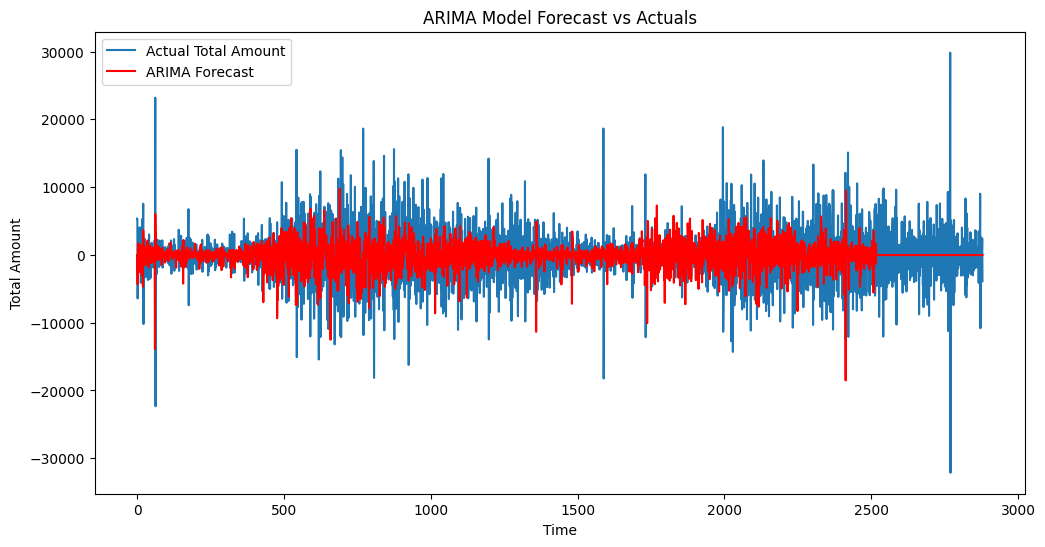

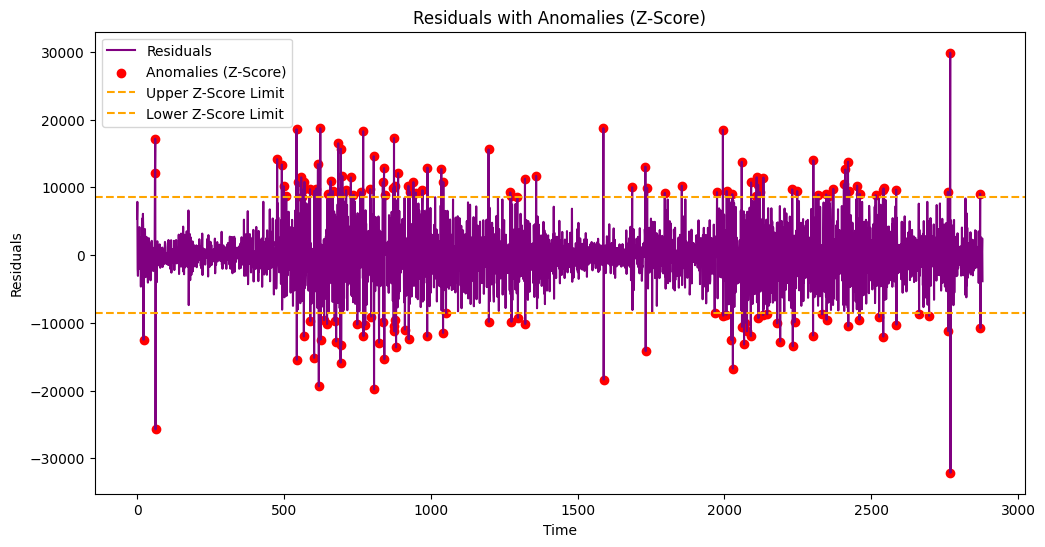

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


target = df_actual_stationary['Total_Amount']

non_fraud_data = target[df_actual_stationary['Fraud_Count'] == 0]

p, d, q = 1, 0, 1
model = ARIMA(non_fraud_data, order=(p, d, q))

arima_model = model.fit()

forecast = arima_model.predict(start=target.index[0], end=target.index[-1])
residuals = target - forecast

mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
z_threshold = 2
upper_limit = mean_residual + z_threshold * std_residual
lower_limit = mean_residual - z_threshold * std_residual

anomalies_zscore = residuals[(residuals > upper_limit) | (residuals < lower_limit)]

plt.figure(figsize=(12, 6))
plt.plot(target, label='Actual Total Amount')
plt.plot(forecast, color='red', label='ARIMA Forecast')
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(residuals, color='purple', label='Residuals')
plt.scatter(anomalies_zscore.index, anomalies_zscore, color='red', label='Anomalies (Z-Score)', marker='o')
plt.axhline(y=upper_limit, color='orange', linestyle='--', label='Upper Z-Score Limit')
plt.axhline(y=lower_limit, color='orange', linestyle='--', label='Lower Z-Score Limit')
plt.title('Residuals with Anomalies (Z-Score)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

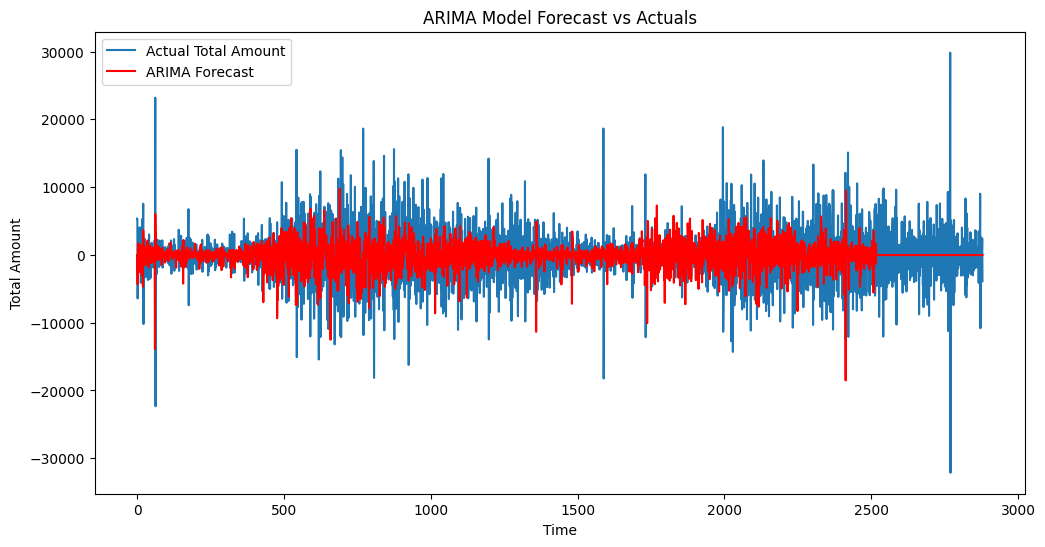

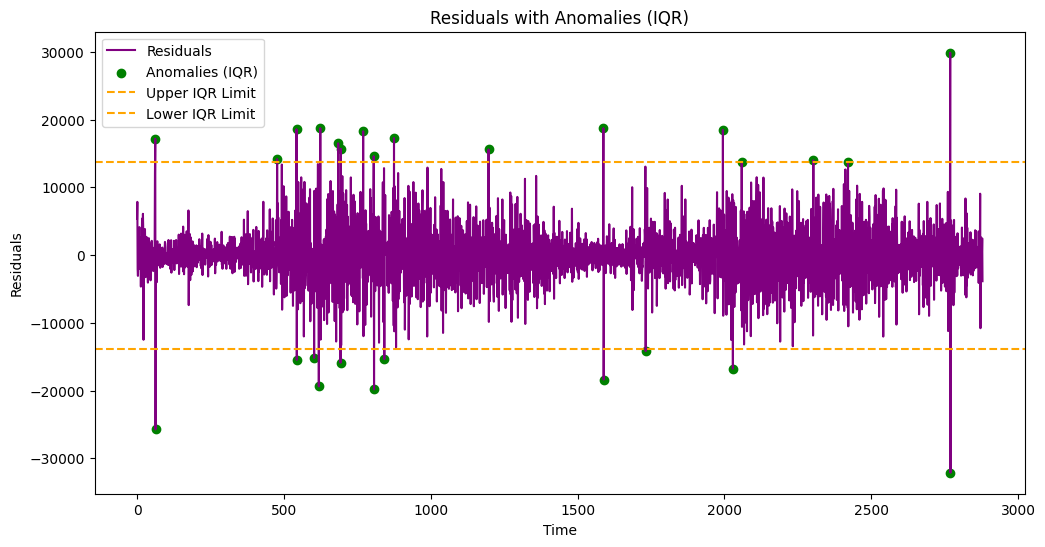

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

target = df_actual_stationary['Total_Amount']

non_fraud_data = target[df_actual_stationary['Fraud_Count'] == 0]

p, d, q = 1, 0, 1
model = ARIMA(non_fraud_data, order=(p, d, q))

arima_model = model.fit()

forecast = arima_model.predict(start=target.index[0], end=target.index[-1])
residuals = target - forecast

# IQR (Interquartile Range)Threshold for Anomaly Detection
q1 = np.percentile(residuals, 25)
q3 = np.percentile(residuals, 75)
iqr = q3 - q1
iqr_threshold = 3

upper_limit_iqr = q3 + iqr_threshold * iqr
lower_limit_iqr = q1 - iqr_threshold * iqr

anomalies_iqr = residuals[(residuals > upper_limit_iqr) | (residuals < lower_limit_iqr)]

plt.figure(figsize=(12, 6))
plt.plot(target, label='Actual Total Amount')
plt.plot(forecast, color='red', label='ARIMA Forecast')
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

# Plot Residuals and Anomalies (IQR)
plt.figure(figsize=(12, 6))
plt.plot(residuals, color='purple', label='Residuals')
plt.scatter(anomalies_iqr.index, anomalies_iqr, color='green', label='Anomalies (IQR)', marker='o')
plt.axhline(y=upper_limit_iqr, color='orange', linestyle='--', label='Upper IQR Limit')
plt.axhline(y=lower_limit_iqr, color='orange', linestyle='--', label='Lower IQR Limit')
plt.title('Residuals with Anomalies (IQR)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()



In [ ]:
# USING THE ORIGINAL DATASET FOR ML/DL FRAUD DETECTION

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])
X_test_scaled.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Training class distribution:\n", y_train.value_counts())
print("Testing class distribution:\n", y_test.value_counts())


Training set size: (227845, 30)
Testing set size: (56962, 30)
Training class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
Testing class distribution:
 Class
0    56864
1       98
Name: count, dtype: int64


In [ ]:
# SINCE, THE DATASET IS HIGHLY IMBALANCED, WE USE SMOTE (Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Class distribution before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64
Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
# FIRST, WE TRAIN AND TEST A SIMPLE ML LOGISTIC REGRESSION MODEL.

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)

y_test_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred = logistic_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962


Area Under Precision-Recall Curve (AUPRC): 0.78315327127905


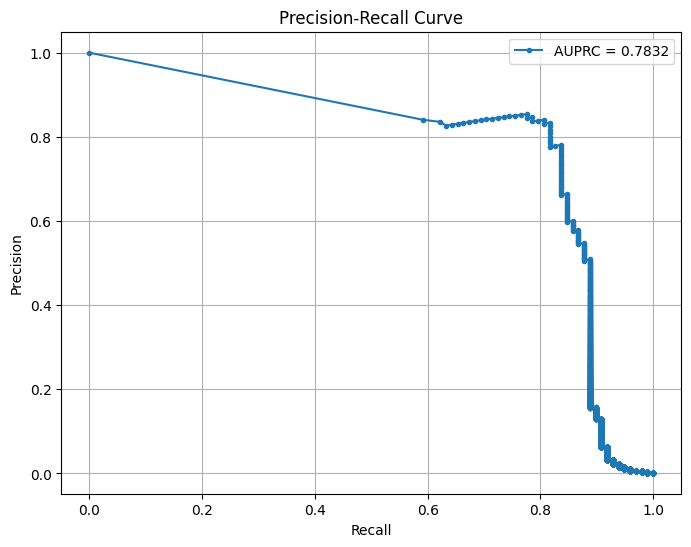

In [ ]:
classification_rep = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", classification_rep)

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
auprc = auc(recall, precision)
print("\nArea Under Precision-Recall Curve (AUPRC):", auprc)

# PLOTTING THE AREA UNDER PRECISON RECALL GRAPH

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

FROM THE CLASSIFICATION REPORT, WE CAN INCUR THE FOLLOWING INSIGHTS -

1.) THE MODEL PROVIDES HIGH ACCURACY AND RECALL.
2.) THE PRECISION AND F1 SCORE IS VERY ALL
3.) THIS IS DUE TO THE FACT THAT THE MODEL HAS A HIGH FALSE-POSITIVE RATE. THIS MEANS THAT MANY NON- FRADULENT TRANSACTIONS ARE BEING FLAGGED INCORRECTLY.

In [ ]:
# NOW, IMPLEMENTING A RANDOMFOREST MODEL

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100, max_depth=10)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
y_test_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
classification_rep_rf = classification_report(y_test, y_test_pred_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_pred_rf_proba)
auprc_rf = auc(recall_rf, precision_rf)

In [ ]:
print("Random Forest Classification Report:\n", classification_rep_rf)
print("\nAUPRC for Random Forest:", auprc_rf)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.89      0.66        98

    accuracy                           1.00     56962
   macro avg       0.76      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962


AUPRC for Random Forest: 0.7981729146408021


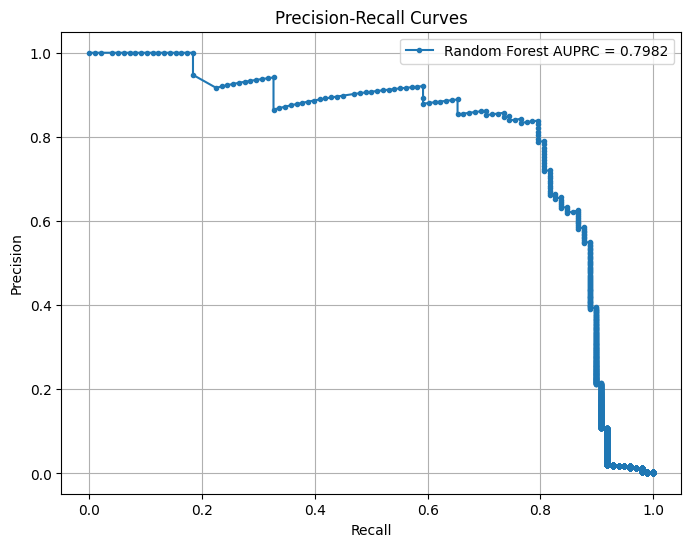

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, marker='.', label=f'Random Forest AUPRC = {auprc_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid()
plt.show()

RANDOM FOREST MODEL EVALUATION INSIGHTS -

1.) THE MODEL IS BETTER AT HANDLING FALSE POSITIVES
2.) THE AREA UNDER THE CURVE HAS INCREASED AS WELL

HOWEVER, IT IS STILL NOT UPTO OUR STANDARDS.

In [ ]:
# USING A XGBOOST (EXTREME GRADIENT BOOSTING) CLASSIFIER NEXT
# It is a machine learning library that uses gradient-boosted decision trees (GBDTs) to solve data science problems

xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=99, eval_metric="logloss", use_label_encoder=False)
xgb_model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:36:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_test_pred_xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
classification_rep_xgb = classification_report(y_test, y_test_pred_xgb)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_test_pred_xgb_proba)
auprc_xgb = auc(recall_xgb, precision_xgb)

In [ ]:
print("\nXGBoost Classification Report:\n", classification_rep_xgb)
print("\nAUPRC for XGBoost:", auprc_xgb)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.86      0.74        98

    accuracy                           1.00     56962
   macro avg       0.82      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962


AUPRC for XGBoost: 0.864001788527654


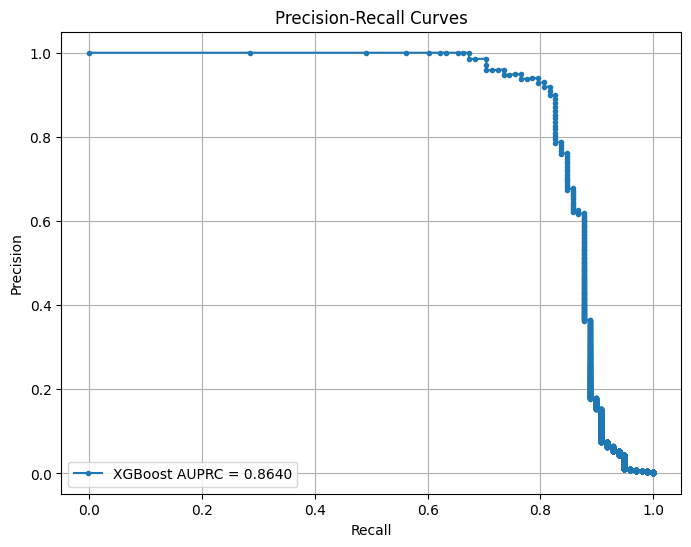

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, marker='.', label=f'XGBoost AUPRC = {auprc_xgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid()
plt.show()

XGBoost is a supervised learning algorithm that uses multiple simpler models to predict a target variable. It can be used for regression, classification, and ranking problems.

EVALUATION OF XGBOOST MODEL -

1.) MUCH BETTER AT EVALUATING FALSE POSITIVES
2.) GREATLY INCREASED THE AUPRC
3.) THE RECALL AND F1 SCORE ARE ALSO DECENT

In [ ]:
threshold = 0.7
y_test_pred_xgb_adjusted = (y_test_pred_xgb_proba >= threshold).astype(int)

classification_rep_xgb_adjusted = classification_report(y_test, y_test_pred_xgb_adjusted)
print("\nAdjusted Classification Report for XGBoost:\n", classification_rep_xgb_adjusted)



Adjusted Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.85      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



USING A THRESHOLD IN THE XGBOOST CLASSIFIER -

1.) GREATLY ENHANCES THE PRECISION AND F1SCORE OF FRADULENT CASES
2.) AT SLIGHT EXPENSE OF RECALL

In [ ]:
# DOING A GRID SEARCH TO FIND THE BEST PARAMETER FOR XGBOOST CLASSIFIER

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'scale_pos_weight': [50, 75, 99]
}

grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False), param_grid, cv=3, scoring='precision')
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_test_pred_best_proba = best_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred_best = best_model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:43:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 50}


In [ ]:
classification_rep_best = classification_report(y_test, y_test_pred_best)
print("\HyperParameter Classification Report:\n", classification_rep_best)

\HyperParameter Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.88      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.94      0.87     56962
weighted avg       1.00      1.00      1.00     56962



THE BEST PARAMETERS FOR GRID SEARCH DIDN'T PROVIDE MUCH IMPROVEMENT.

In [ ]:
# USING A SIMPLE DL FNN (Feedforward Neural Network)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  
model.add(Dropout(0.2)) 
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=2)

y_test_pred_nn = model.predict(X_test_scaled)
y_test_pred_nn = (y_test_pred_nn >= 0.5).astype(int)

classification_rep_nn = classification_report(y_test, y_test_pred_nn)
print("\nNeural Network Classification Report:\n", classification_rep_nn)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3561/3561 - 10s - 3ms/step - accuracy: 0.9958 - loss: 21.2192 - val_accuracy: 0.9983 - val_loss: 0.0772
Epoch 2/20
3561/3561 - 7s - 2ms/step - accuracy: 0.9980 - loss: 0.1316 - val_accuracy: 0.9983 - val_loss: 0.0251
Epoch 3/20
3561/3561 - 10s - 3ms/step - accuracy: 0.9982 - loss: 0.0465 - val_accuracy: 0.9983 - val_loss: 0.0133
Epoch 4/20
3561/3561 - 8s - 2ms/step - accuracy: 0.9982 - loss: 0.0366 - val_accuracy: 0.9983 - val_loss: 0.0127
Epoch 5/20
3561/3561 - 7s - 2ms/step - accuracy: 0.9982 - loss: 0.0218 - val_accuracy: 0.9983 - val_loss: 0.0127
Epoch 6/20
3561/3561 - 12s - 3ms/step - accuracy: 0.9983 - loss: 0.0253 - val_accuracy: 0.9983 - val_loss: 0.0746
Epoch 7/20
3561/3561 - 11s - 3ms/step - accuracy: 0.9982 - loss: 0.0250 - val_accuracy: 0.9983 - val_loss: 0.0127
Epoch 8/20
3561/3561 - 8s - 2ms/step - accuracy: 0.9982 - loss: 0.0198 - val_accuracy: 0.9983 - val_loss: 0.0127
Epoch 9/20
3561/3561 - 8s - 2ms/step - accuracy: 0.9981 - loss: 0.0258 - val_accuracy: 0.9983 - val_lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


THE FNN FAILS TO DETECT ANY FRADULENT CASES.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

X_train_scaled = X_train_scaled.values
X_test_scaled = X_test_scaled.values

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])  # 1 time step
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])  # 1 time step

class_weights = {0: 1., 1: 100.}

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))  
model.add(Dropout(0.2)) 
model.add(LSTM(32, return_sequences=False)) 
model.add(Dropout(0.2))  
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test), class_weight=class_weights)

y_test_pred_lstm = model.predict(X_test_scaled)
y_test_pred_lstm = (y_test_pred_lstm >= 0.5).astype(int) 

classification_rep_lstm = classification_report(y_test, y_test_pred_lstm)
print("\nLSTM Classification Report:\n", classification_rep_lstm)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9972 - loss: 0.5351 - val_accuracy: 0.9983 - val_loss: 0.1349
Epoch 2/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.9982 - loss: 0.5102 - val_accuracy: 0.9983 - val_loss: 0.1493
Epoch 3/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9983 - loss: 0.4912 - val_accuracy: 0.9983 - val_loss: 0.1635
Epoch 4/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9982 - loss: 0.5144 - val_accuracy: 0.9983 - val_loss: 0.1063
Epoch 5/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.9983 - loss: 0.5062 - val_accuracy: 0.9983 - val_loss: 0.1557
Epoch 6/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9982 - loss: 0.5148 - val_accuracy: 0.9983 - val_loss: 0.1514
Epoch 7/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9982 - loss: 0.5051 - val_accuracy: 0.9983 - val_loss: 0.1488
Epoch 8/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.9984 - loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


THE LSTM MODEL ALSO FAILED TO ACCURATELY DETECT FRADULENT CASES.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

model = Sequential()
model.add(Dense(128, input_dim=X_train_res.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(X_train_res, y_train_res, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=2)

y_test_pred_nn = model.predict(X_test_scaled)
y_test_pred_nn = (y_test_pred_nn >= 0.5).astype(int)

classification_rep_nn = classification_report(y_test, y_test_pred_nn)
print("\nNeural Network Classification Report (with SMOTE):\n", classification_rep_nn)





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7108/7108 - 18s - 2ms/step - accuracy: 0.4998 - loss: 28.0666 - val_accuracy: 0.0019 - val_loss: 0.7031
Epoch 2/20
7108/7108 - 14s - 2ms/step - accuracy: 0.4996 - loss: 0.6995 - val_accuracy: 0.0020 - val_loss: 0.6948
Epoch 3/20
7108/7108 - 20s - 3ms/step - accuracy: 0.5002 - loss: 0.6977 - val_accuracy: 0.9983 - val_loss: 0.6889
Epoch 4/20
7108/7108 - 13s - 2ms/step - accuracy: 0.4996 - loss: 0.6958 - val_accuracy: 0.0020 - val_loss: 0.6990
Epoch 5/20
7108/7108 - 20s - 3ms/step - accuracy: 0.4987 - loss: 0.6942 - val_accuracy: 0.9983 - val_loss: 0.6926
Epoch 6/20
7108/7108 - 21s - 3ms/step - accuracy: 0.5000 - loss: 0.6939 - val_accuracy: 0.9983 - val_loss: 0.6896
Epoch 7/20
7108/7108 - 20s - 3ms/step - accuracy: 0.4991 - loss: 0.6948 - val_accuracy: 0.9983 - val_loss: 0.6882
Epoch 8/20
7108/7108 - 14s - 2ms/step - accuracy: 0.5005 - loss: 0.6985 - val_accuracy: 0.9983 - val_loss: 0.6877
Epoch 9/20
7108/7108 - 14s - 2ms/step - accuracy: 0.4995 - loss: 0.7026 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


APPLYING SMOTE ON THE FNN TRAINING DATASET DIDN'T HELP IN DETECTING FALSE POSITIVES.

In [ ]:
# USING A STACKED ENSEMBLE MODLE APPROACH TO FURTHER IMPROVE PERFORMANCE OF XGBOOST

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, ClassifierMixin
import xgboost as xgb
import numpy as np
from sklearn.metrics import roc_auc_score



xgb_model = xgb.XGBClassifier(eval_metric="mlogloss", random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)


class StackingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_learners, meta_learner):
        self.base_learners = base_learners
        self.meta_learner = meta_learner

    def fit(self, X, y):
        self.base_learners_ = [learner.fit(X, y) for learner in self.base_learners]

        base_preds = np.column_stack([learner.predict_proba(X)[:, 1] for learner in self.base_learners_])

        self.meta_learner.fit(base_preds, y)

        return self

    def predict(self, X):
        base_preds = np.column_stack([learner.predict_proba(X)[:, 1] for learner in self.base_learners_])

        return self.meta_learner.predict(base_preds)

    def predict_proba(self, X):
        base_preds = np.column_stack([learner.predict_proba(X)[:, 1] for learner in self.base_learners_])

        return self.meta_learner.predict_proba(base_preds)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a stacking model using XGBoost, RandomForest, and Logistic Regression as base models, and Logistic Regression as meta-learner

stacking_model = StackingClassifier(base_learners=[xgb_model, rf_model, lr_model], meta_learner=LogisticRegression())

stacking_model.fit(X_train_scaled, y_train)

y_pred_stacking = stacking_model.predict(X_test_scaled)

print("\nStacking Model Classification Report:\n", classification_report(y_test, y_pred_stacking))

y_pred_proba_stacking = stacking_model.predict_proba(X_test_scaled)[:, 1]
auprc_stacking = roc_auc_score(y_test, y_pred_proba_stacking)
print(f"AUPRC for Stacking Model: {auprc_stacking}")




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC for Stacking Model: 0.9634807144579836


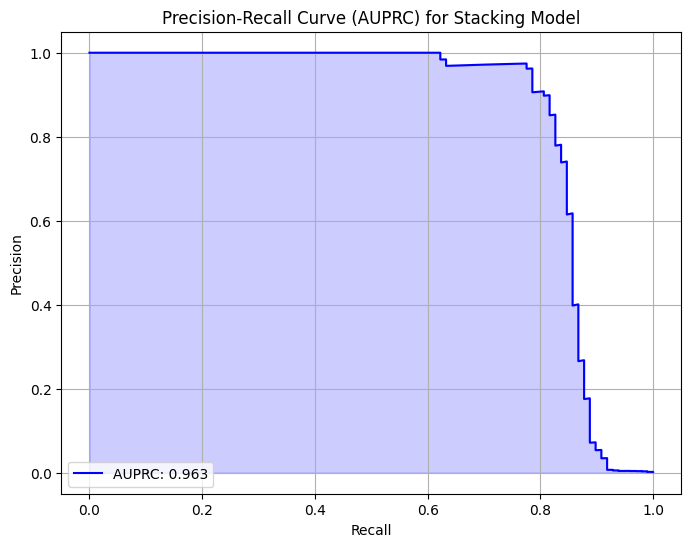

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_pred_proba_stacking = stacking_model.predict_proba(X_test_scaled)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_stacking)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='AUPRC: {:.3f}'.format(auprc_stacking))
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC) for Stacking Model')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

THE STACKED ENSEMBLE MODEL COMPRISING OF - XGBOOST, RANDOMFOREST AND LOGISTIC REGRESSION PROVIDES BY FAR THE BEST RESULTS.

IT IS ABLE TO CORRECT IDENTIFY AROUND 97% OF ALL FRADULENT CASES AND HANDLES THE IMBALANCED DATA VERY WELL.

THE AUPRC IS VERY IMPRESSIVE AS WELL.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


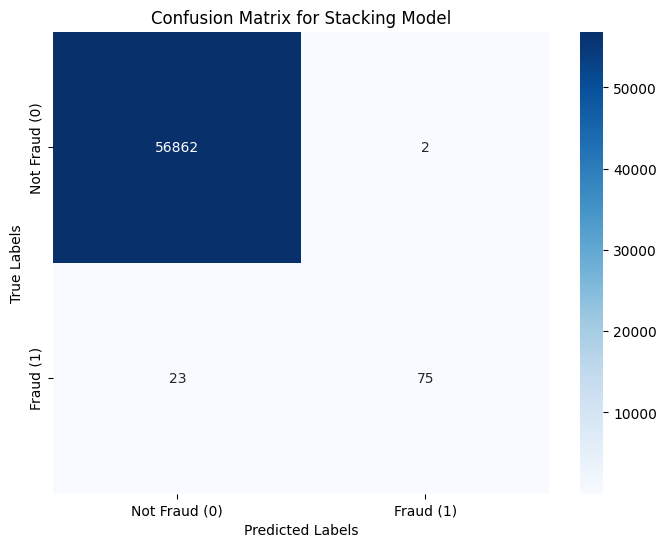

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

X_test_scaled_reshaped = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else X_test_scaled
X_test_scaled_reshaped = X_test_scaled_reshaped.reshape(-1, X_test_scaled_reshaped.shape[1])

y_pred_stacking = stacking_model.predict(X_test_scaled_reshaped)

cm = confusion_matrix(y_test, y_pred_stacking)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud (0)', 'Fraud (1)'], yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix for Stacking Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



CONCLUSION:

Combining ARIMA and Stacking Model Results
Bringing these together, we can infer:

Complementary Strengths:

1.) ARIMA residuals excel in identifying anomalies based on historical patterns in time-series data.
These residual anomalies could be used as an additional feature in the stacked ensemble or as a pre-filtering step to reduce noise in the dataset.

2.) The stacked ensemble model is a robust classification tool that handles the imbalance problem well and directly predicts fraud likelihood.

Actionable Combination:

Enhanced Feature Engineering:

1.) Incorporate the ARIMA residuals as a new feature (e.g., "Residual Anomaly Score") into the input data for the stacked model. This could further improve its predictive power, especially for identifying difficult fraud cases.

Tiered Detection Framework:

1.) Use ARIMA residuals for pre-filtering data, flagging transactions that deviate significantly.
2.) Pass these flagged transactions into the stacked ensemble model for final classification.



The combination of time-series anomaly detection (ARIMA) and the stacked ensemble ensures a comprehensive fraud detection pipeline:

1.) ARIMA detects anomalies that might not otherwise be flagged by pure classification models.

2.) Stacking ensures high precision and recall for imbalanced fraud detection.
Our system now benefits from both statistical modeling (for anomalies) and advanced machine learning (for classification), making it:

Accurate: The high precision ensures reliability.
Comprehensive: The recall ensures most fraud cases are detected.
Scalable: The combination can adapt as more data becomes available.


Our fraud detection system, combining ARIMA residual analysis and stacked ensemble classification, is highly effective. It leverages the strengths of both approaches to create a layered, accurate, and scalable detection pipeline. With further optimization (e.g., feature engineering and hyperparameter tuning), this hybrid approach can likely outperform standalone models or methods.



